# 0. Systematische Behandlung von Gleichgewichten





## Unabhängige Reaktionsgleichungen aufstellen 
In jeder unabhängigen Reaktionsgleichung wird eine neue Spezies berücksichtigt

## Mastervariable festlegen 
Variable, als deren Funktion man möglichst viele andere Spezies berechnen kann

## Startwerte festlegen
Welche Spezies gibt man in welchen Aktivitäten zu

## Direktes Lösen durch aufstellen eines Gleichungssystems
Man kann Gleichungssysteme lösen, indem man gekoppelte Gleichungen aufstellt und diese dann durch einen Solver direkt lösen lässt. Das geht für einfache Fälle sehr gut. Bei komplizierten Fällen ist sie hingegen ungeeinget. Die Rechenzeit steigt mit zunehmender Anzahl Gleichungen sehr stark und manche Fälle (Kombination aus Komplex- und Fällungsreaktionen) lässt sich nur auf diesem Weg überhaupt keine Lösung finden. Eine Lösung mit Mastervariabeln und Bilanzen, die grafischen Methoden angelehnt ist, ist hingegen immer möglich und auch bei komplexen Systemen effizien   

## Systematische Lösung mit Mastervariabeln, Bilanzen und Iteration
Bei dieser Lösungsvariante werden die Konzentrationen aller Spezies als Funktion möglichst weniger Mastervariabeln ausgedrückt - in vielen Fällen reicht eine einzige, und oft ist der pH geeignet.
Nun kann man alle Gleichgewichte als Funktion dieser einen Variabeln darstellen - allenfalls sind es zwei und man erhält für jede Spezies Flächen.

Dann benötigt man für jede Mastervariable eine Bilanz, die bei der Lösung  verschwindet (Null wird). Trägt man diese Bilanz auch auf, erkennt man die Lösung (Nullstelle), man kann die Bilanz aber auch für eine iterative Lösung verwenden. 

Geeignet für eine Bilanz kann 

- die Ladung sein (sobald nur ungeladene Spezies zugegeben werden, z.b. Lösen eines Salzes in Wasser und anschliessende Säure/Base-Reaktion) (Ladung der Kationen plus Ladung der Anionen muss Null sein).
- die Protonenbilanz (Gesamte Menge der freigesetzten mit der wegreagierenden Protonen minus die Protonenkonzentration muss Null sein.
- Gesamtbilanz eines Zentralions oder aller Spezies einer Säure. 

Ein wichtigstes Hilfsmittel kann eine Zustansdssumme (partition function) sein - dieser sehr passende Begriff stammt aus der Thermodynamik und kann auf Gleichgewichtsberechnungen übertragen werden. Wenn man für einen gegebenen pH schnell berechnen will, wie viel von welcher Säuerspezies vorliegt, kann man das Verhältnis der Säurespezies berechnen. Beispielsweise kann man den Anteil der vollständig protonierten Spezies auf 1 festlegen und dann für jede andere Spezies relativ dazu berechnen, wie gross ihre Konzentration ist (umgestellte Hendersson Hasselbalch). Die Summe dieser relativen Konzentrationen ist die Zustandssumme. Teilt man nun eine relative Konzentrationen durch die Zustandssumme, so erhält man den relativen Anteil der Komponente (relative Anteile ergeben in der Summe 1). Multipliziert man den relativen Anteil mit der Gesamtkonzentration, so erhält man die Konzentration der entsprechenden Spezies. Im Folgenden werden relative Konzentrationen durch ein vorangestelltes a_ markiert. 

Beispiel: in welchen Konzentrationen liegen die Schweflige-Säure-Spezies bei pH 1 vor?

In [2]:
pH = 1
pKS1 = 1.96
pKS2 = 7.2
a_H2A = 1
a_HA = 10**(pH-pKS1)
a_A = a_HA * 10**(pH-pKS2)
Z = a_H2A + a_HA + a_A
print(f"Z = {Z}, a_H2A = {a_H2A},  a_HA = {a_HA},  a_A = {a_A}")

c0 = 0.1
print(f"[H2A] = {c0/Z * a_H2A}")
print(f"[HA] = {c0/Z * a_HA}")
print(f"[A] =  {c0/Z * a_A}")

Z = 1.1096478887974155, a_H2A = 1,  a_HA = 0.1096478196143185,  a_A = 6.918309709189362e-08
[H2A] = 0.09011867729354699
[HA] = 0.009881316471763822
[A] =  6.2346892009924904e-09


### Vorgehen systematische Lösung mit Mastervariabeln, Bilanzen und Iteration
#### Funktion
Zuerst schreibt man eine Funktion, die als Funktion der Mastervariablen die Werte sämtlicher Spezies (und zusätzlicher nützlicher Grössen wie pH) zurückgibt. 
Zudem soll die Funktion eine Bilanzgrösse ausgeben, die bei der Lösung Null wird. 

#### Grafische Lösung
Nun trägt man die gewünschten Sepezieskonzentrationen, weitere Parameter und den Bilanzwert auf. 
Die Lösung kann man an der Nullstelle des Bilanzwertes ablesen. Indem man den Bereich der Mastervariabeln mehr und mehr eingrenzt, kann man den Wert praktisch beliebig genau grafisch ablesen. 

### Iterative Lösung
Durch rekursive Iteration kann man auch rein rechnerisch den Punkt ermitteln, bei dem die Bilanzgrösse verschwindet. 


### Übersichtliche Darstellung mit Tableaus
Mit Hilfe von Tableaus (aquatische Chemie) kann man Gleichungssysteme übersichtlich darstellen. Man legt Komponenten fest ("a set of chemical entities that permits a complete descriotipn of the stochiometry of the system"), drückt die anderen Konzentrationen als Funktion dieser Komponenten aus und kann Gleichungsreaktionen und Bilanzen aus diesen Tableaux ablesen. Die Tableaux sind allerdins einigermassen abstrakt.   
Auch ohne Tableaus kann folgende Überlegung nützlich sein: Wenn ein System aus r unabängigen Reaktionen (Gleichungen) besteht, in denen s Spezies auftreten, so benötigt man nebst der Gleichungen s-r Komponenten für eine Beschreibung des Systems. 


## Bilanzen

Nun braucht es noch Bilanzen. Oft kann man aus verschiedenen Möglichkeiten auswählen. 

Bilanzen können auch sein: 
- Protonenbilanz: Gebildete H3O+ abzüglich wegreagierte H3O+ ergibt Konzentration von H3O+ 
- Wenn eine bestimmte Menge Phosphorsäure in Wasser gelöst wird: die Summe aller Phosphorsäurespezies

Da in dieses System nur ungeladenen Formeleinheiten zugegeben werden, muss die gesamte Ladung z.B. Null sein

$2[CO_3^{2-}]+[HCO_3^{-}] + [OH^-] = [H^+] + 2[Ca^{2+}]$

## Mastervariable

Wenn alle Konzentrationen als Funktion einer Mastervariablen ausgedrückt werden. Die Verläufe der Konzentrationen werden "an die Mastervariable gehängt"

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

a,b,c,d,e = sp.symbols("a b c d e")

colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] + plt.rcParams['axes.prop_cycle'].by_key()['color']

def abbildung(ax,x,werte,namen,log=True, xlabel="pH", ylabel=None, xlim=False,ylim=False, ls = False, colors=None):
    if not ls:
        ls = ["-" for i in range(len(werte))]
    if log:
        for i,y in enumerate(werte):
            y = np.array(y)
            indexe = np.where(y>0)
            if colors == None:
                color = None
            else: 
                color = colors[i]
            ax.plot(x[indexe],np.log10(y[indexe]),label= namen[i], ls = ls[i],color=colors[i])
        if ylabel==None:
            ylabel = r"$log_{10}(conz)$"
    else: 
        for i,y in enumerate(werte):
            if colors == None:
                color = None
            else: 
                color = colors[i]
            ax.plot(x,y,label= namen[i], ls = ls[i],color=colors[i])
        if ylabel==None:
            ylabel = r"$conz \ [\frac{mol}{L}]$"
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    ax.grid()     


In [9]:
import re
from collections import Counter

def chem_to_latex(formel: str) -> str:
    # Schritt 1: Ladung extrahieren
    ladungs_match = re.search(r'[+-]+$', formel)
    ladung = ''
    if ladungs_match:
        zeichen = ladungs_match.group()
        count = Counter(zeichen)
        net_charge = count['+'] - count['-']
        if net_charge > 0:
            ladung = f"^{net_charge if net_charge > 1 else ''}+"
        elif net_charge < 0:
            ladung = f"^{abs(net_charge) if abs(net_charge) > 1 else ''}-"
        # Rest der Formel ohne die Vorzeichen
        formel = formel[:ladungs_match.start()]

    # Schritt 2: Zahlen tiefstellen (z. B. O3 → O_3)
    def tiefstellen(match):
        return f"{match.group(1)}_{match.group(2)}"

    formel_mit_indices = re.sub(r'([A-Za-z]+)(\d+)', tiefstellen, formel)

    # Schritt 3: Alles in \mathrm{...} setzen und Ladung hochstellen
    latex_code = formel_mit_indices
    if ladung:
        latex_code += f"^{{{ladung[1:]}}}"  # [1:] entfernt das erste "^", das wird von LaTeX selbst verwendet
    latex_code = "$" + latex_code + "$"
    return latex_code

In [11]:
# wird benötigt, wenn Daten an eine Liste angehängt werden. Die Unterlisten entsprechen dann einer Gleichgewichtszustand. 
# für die Darstellung muss eine Unterliste aber einem Konzentrationsverlauf entsprechen
def transpose_with_zip(matrix):
    return list(map(list, zip(*matrix)))

In [261]:
## einfacher Solver
pKs = 4.76
K = 10**-pKs
c0 = 0.1

eq1 = a * a/(c0-a) - K

res = sp.solve([eq1.as_numer_denom()[0]],[a])

# resultate und der Log ihres Absolutwerts
for u in res:
    for r in u:
        print(r," log abs",np.log10(abs(float(r))))


-0.00132697437823480  log abs -2.8771374625904764
0.00130959636994731  log abs -2.8828625374095225


## 1. Säure/Base-Gleichgewichte und Titrationskurven 
## Die unabhängigen Reaktionsgleichungen
In jeder unabhängigen Reaktionsgleichung wird eine neue Spezies berücksichtigt. 
Eingesetzt sind die Gleichgewichtskonstanten von Phosphorsäurespezies

Säure/Base-Reaktionen
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(1)$</span> 
    <span style="display:inline-block; width:10.5cm;">$H_3A \ \leftrightarrows \ H_2A + H^+$ </span>
    <span style="display:inline-block; width:4cm;">$K = 1.1 \cdot 10^{-2}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -1.96$</span>
</div>

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(2)$</span> 
    <span style="display:inline-block; width:10.5cm;">$H_2A \ \leftrightarrows \ HA + H^+$ </span>
    <span style="display:inline-block; width:4cm;">$K = 6.1 \cdot 10^{-8}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -7.21$</span>
</div>
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(3)$</span> 
    <span style="display:inline-block; width:10.5cm;">$HA \ \leftrightarrows \ A + H^+$ </span>
    <span style="display:inline-block; width:4cm;">$K = 4.8 \cdot 10^{-13}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -12.32$</span>
</div>

Autoprotolyse
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(4)$</span> 
    <span style="display:inline-block; width:10.5cm;">$ H_2O  \ \leftrightarrows \ H^+ + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 1.0 \cdot 10^{-14}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -14$</span>
</div>


## Direktes Lösen des Gleichungssystems
Welcher pH stellt sich ein, wenn reine Phosphorsäure der Konzentration c0 in Wasser gelöst wird?

### Formelumsätze

Reaktion (1): Formelumsatz a
<table>
    <tr> <td></td> <td>$H_3A$</td> <td>$\leftrightarrows$</td> <td>$H_2A$</td> <td>+ $H^+$</td> </tr>
    <tr> <td>Start </td> <td>$c_0$</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-a</td> <td></td> <td>a</td> <td>a</td> </tr>
    <tr> <td>Glgw</td> <td>$c_0 - a$</td> <td></td> <td>a - b</td> <td>a + b + c + d</td> </tr>
</table>

Reaktion (2): Formelumsatz b
<table>
    <tr> <td></td> <td>$H_2A$</td> <td>$\leftrightarrows$</td> <td>$HA$</td> <td>+ $H^+$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-b</td> <td></td> <td>b</td> <td>b</td> </tr>
    <tr> <td>Glgw</td> <td>a-b</td> <td></td> <td>b - c</td> <td>a + b + c + d</td> </tr>
</table>

Reaktion (3): Formelumsatz c
<table>
    <tr> <td></td> <td>$HA$</td> <td>$\leftrightarrows$</td> <td>$A$</td> <td>+ $H^+$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-c</td> <td></td> <td>c</td> <td>c</td> </tr>
    <tr> <td>Glgw</td> <td>b-c</td> <td></td> <td>c</td> <td>a + b + c + d</td> </tr>
</table>

Reaktion (4): Formelumsatz d
<table>
    <tr> <td></td> <td>$H_2O$</td> <td>$\leftrightarrows$</td> <td>$H^+$</td> <td>+ $OH^-$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>(-d)</td> <td></td> <td>d</td> <td>d</td> </tr>
    <tr> <td>Glgw</td> <td>(-d)</td> <td></td> <td>a + b + c + d</td> <td>d</td> </tr>
</table>

### Bilanzen
- {$H_3A$} = $c_0 - a$
- {$H_2A$} = a - b
- {$HA$} = b - c
- {$A$} = c
- {$H^+$} = a + b + c + d
- {$OH^-$} = d

### Auch wenn man Autoprotolyse auskommentiert, dauert das Lösen folgender Gleichungen etwa eine Stunde. Daher ist das hier auskommentiert, damit die Werte bleiben. 

In [16]:
# Autoprotolyse kann vernachlässigt werden
"""
c0 = 0.1
KS1 = 1.1E-2
KS2 = 6.1E-8
KS3 = 4.8E-13
eq1 = (a-b) * (a+b+c)/(c0-a) - KS1
eq2 = (b-c)*(a+b+c) /(a-b) - KS2
eq3 = c*(a+b+c)/(b-c) - KS3
# eq4 = d * (a+b+c+d) - 1E-14
#direkter Löseversuch liefert keine Lösung
res = sp.solve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0]],[a,b,c])
res
"""
"""
[(-0.0391191909480838 + 8.470329472543e-22*I,
  6.10001902392497e-8 - 1.61558713389263e-27*I,
  -7.48485238659449e-19 - 1.00226770626927e-50*I),
 (0.0281191909480838 - 4.2351647362715e-22*I,
  6.09997353436554e-8 - 1.61558713389263e-27*I,
  1.0412749606138e-18 + 2.67271213054282e-50*I),
 (0.0999999999999998 - 3.3881317890172e-21*I,
  0.100003541088098 - 1.6940658945086e-21*I,
  -0.200003541088817 - 4.70187551444757e-37*I),
 (0.100002218222295 - 1.6940658945086e-21*I,
  -0.100002733678989 + 3.3881317890172e-21*I,
  3.93457488497915e-7 + 4.58298941093007e-40*I)]
  """

'\n[(-0.0391191909480838 + 8.470329472543e-22*I,\n  6.10001902392497e-8 - 1.61558713389263e-27*I,\n  -7.48485238659449e-19 - 1.00226770626927e-50*I),\n (0.0281191909480838 - 4.2351647362715e-22*I,\n  6.09997353436554e-8 - 1.61558713389263e-27*I,\n  1.0412749606138e-18 + 2.67271213054282e-50*I),\n (0.0999999999999998 - 3.3881317890172e-21*I,\n  0.100003541088098 - 1.6940658945086e-21*I,\n  -0.200003541088817 - 4.70187551444757e-37*I),\n (0.100002218222295 - 1.6940658945086e-21*I,\n  -0.100002733678989 + 3.3881317890172e-21*I,\n  3.93457488497915e-7 + 4.58298941093007e-40*I)]\n  '

In [175]:
# da die imaginären Anteile riesig sind, kann man sie weglassen
"""
for rs in res:
    resn = rs
    res_a = float(sp.re(resn[0]))
    res_b = float(sp.re(resn[1]))
    res_c = float(sp.re(resn[2]))
    H = res_a + res_b + res_c
    pH = -np.log10(H)
    print(f"[H3A] = {c0 - res_a:.06g}")
    print(f"[H2A] = {res_a - res_b:.06g}")
    print(f"[HA] = {res_b - res_c:.06g}")
    print(f"[A] = {res_c:.06g}")
    print(f"pH = {pH}")
    print()
"""

'\nfor rs in res:\n    resn = rs\n    res_a = float(sp.re(resn[0]))\n    res_b = float(sp.re(resn[1]))\n    res_c = float(sp.re(resn[2]))\n    H = res_a + res_b + res_c\n    pH = -np.log10(H)\n    print(f"[H3A] = {c0 - res_a:.06g}")\n    print(f"[H2A] = {res_a - res_b:.06g}")\n    print(f"[HA] = {res_b - res_c:.06g}")\n    print(f"[A] = {res_c:.06g}")\n    print(f"pH = {pH}")\n    print()\n'

## Lösung mit Mastervariabeln (Grafisch und iterativ)
Bei dieser Lösung erhält man ohne zusätzlichen Aufwand Puffer- und Titrationskurven mitgeliefert. Die Lösung wird in Sekundenbruchteilen gefunden - im Vergleich zu einer Stunde beim direkten Lösen.  

Auch die Berücksichtigung der Autoprotolyse beteutet praktisch kenen Zusatzaufwand (um sie zu entfernen müssen nur die Zele 2, die Bilanz und die Rückgabe angepasst werden


namesA ['H3A', 'H2A', 'HA', 'A']


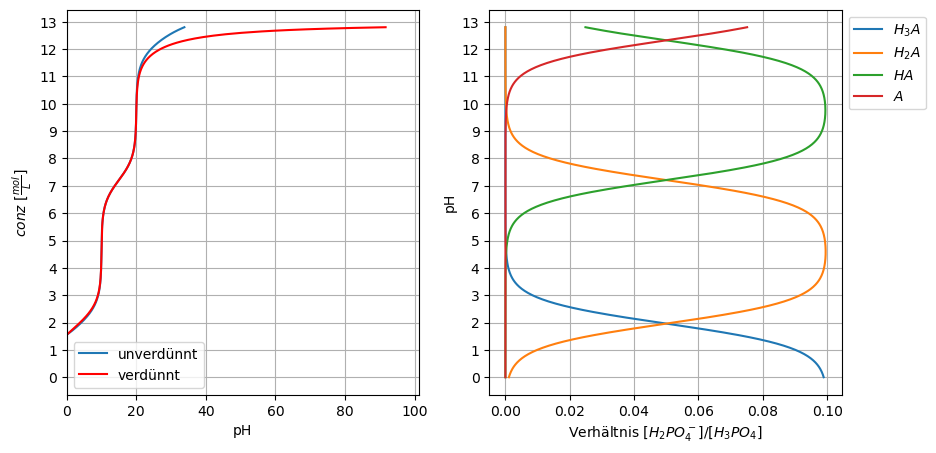

In [325]:
pKs_s = [1.96,7.21,12.32]
pHs = np.linspace(0,12.8,500)
c0 = 0.1 # = cp
ct = 0.1
Vp = 0.1

"""
Anzeige: 
0: mol/L OH-
1: mL Titrans

vorsicht: Verdünnt
"""
anzeige = 1


# diese Funktion kann sowohl mit np.arrays als auch mit einzelnen Werten verwendet werden
def glgw_berechnungen(pH, c0 = 0.1, pKs_s = [1.96,7.21,12.32], Vp = 0.1, ct = 0.1): 
    h = 10**-pH
    oh = 10**-14/h
    try:
        a_spezies = [np.ones(len(pH))] #relative Konzentrationen der Säurespezies, protonierteste =1, von der protoniertesten zur deprotoniertesten
        h_abgegeben = np.zeros(len(pH))
    except: 
        a_spezies = [1] # wenn pH nur eine Zahl und kein Array ist
        h_abgegeben = 0
        
    for i,pKs in enumerate(pKs_s):
        a_spezies.append(a_spezies[-1] * 10**-pKs / h)
    a_spezies = np.array(a_spezies)
    
    Z = np.sum(a_spezies, axis=0)
    c_spezies = c0 * a_spezies/Z #Konzentrationen aller Spezies
    
    for i,c in enumerate(c_spezies):
        h_abgegeben = h_abgegeben + i * c # total von der Säure abgegebene H+
    # man kann entweder eine Ladungsbilanz oder eine Protonenbilanz aufstellen  - hier resultieren identische Bilanzen
    bilanz = oh + h_abgegeben - h #H+-Bilanz = Ladungsbilanz (in diesem Fall) = zugegebene mol/L OH-
    Vt = bilanz * c0 * Vp/ct 
    Vt_v = bilanz * c0 * Vp/(ct+h-oh)  #unter Berücksichtigung der Verdünnung
            # ergibt daraus, dass Autoprotolyse immer genau gleich viel H wie OH liefert
            # der Unterschied von H und OH in der Probe in mol (Vt + Vp)*(H-OH) muss also gleich gross sein wie der Unterschied
            # zwischen hinzugefügten H (H_abgegeben * Vp) und zugefügten OH (ct * Vt) in mol.
            # (Vt + Vp)*([H]-[OH]) = H_abgegeben * Vp - (ct * Vt)
            # Vt * ([H]-[OH]) + Vt*ct = Vp* (H_abgegeben - [H]+[OH]) 
            # Vt ([H]-[OH] + ct) = Vp* (H_abgegeben - [H]+[OH]) 
            # Vt  = Vp* (H_abgegeben - [H]+[OH]) / ([H]-[OH]-ct)
    return np.concatenate((c_spezies,[oh,h, pH, Vt, Vt_v, bilanz]))


namesA = ["H_3PO_4", "H_2PO_4-", "HPO4--","PO4---"]
namesA = []
for i in range(len(pKs_s)+1):
    nH = len(pKs_s)-i
    if nH == 0:
        name = "A"
    elif nH == 1: 
        name = "HA"
    else:
        name = f"H{nH}A"
    namesA.append(name)

print("namesA",namesA)    
werte = glgw_berechnungen(pHs, pKs_s=pKs_s, Vp = Vp, ct= ct)
names = namesA + ["OH-","H+","pH","Vt","Vt (Verdünnung berücksichtigt)","Bilanz:H+ bzw Ladung"]
namen = []
for n in names:
    namen.append(chem_to_latex(n))

ls = ["-" for i in range(len(werte))]
for i in range(3):
    ls[-(i+1)]="--"
ls[-1] = ":"
colors[len(werte)-1] = "k"


fig, axs = plt.subplots(1,2, figsize = [10,5])
Vt = werte[-3]
Vt_v = werte[-2]  #Berücksichtigung Verdünungn
bilanz = werte[-1]


ax = axs[0]
if anzeige == 0:
    x = bilanz
    xlabel = r"Zugabe $OH^- \ \frac{mol}{L}$"
    abbildung(ax=ax,x=x,werte=[pHs],namen=["Titration"], log=False, ls=ls,colors=colors, xlabel=xlabel, ylabel="pH")
    xlims = ax.get_xlim()
elif anzeige == 1:
    x = Vt*1000
    xlabel = "Zugabe Titrans ($OH^-$) [mL]"
    abbildung(ax=ax,x=x,werte=[pHs],namen=["unverdünnt"], log=False, ls=ls,colors=colors, xlabel=xlabel, ylabel="pH")
    #Berücksichtigung Verdünnug
    # !!!!!! Vorsicht: wenn der pH höher als im Titrans wird, lässt er sich gar nicht mehr erreichen und die Kurve schlägt aus 
    x = Vt_v*1000
    xlabel = "Zugabe Titrans ($OH^-$) [mL] bei Verdünnung"
    abbildung(ax=ax,x=x,werte=[pHs],namen=["verdünnt"], log=False, ls=ls,colors=["r"])    
    ax.legend()

xlims = ax.get_xlim()
ax.set_xlim([0,xlims[1]])
ylims = ax.get_ylim()
ax.set_yticks(np.arange(max(0,np.floor(ylims[0])),ylims[1],1))

ax.grid()

ax = axs[1]
for i in range(len(pKs_s)+1):
    abbildung(ax=ax,x=werte[i],werte=[pHs],namen=[namen[i]], log=False, ls=ls,colors=[colors[i]], xlabel="Verhältnis $[H_2PO_4^-] / [H_3PO_4]$", ylabel="pH")
    ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)
    ylims = ax.get_ylim()
ax.set_yticks(np.arange(max(0,np.floor(ylims[0])),ylims[1],1))
ax.grid()



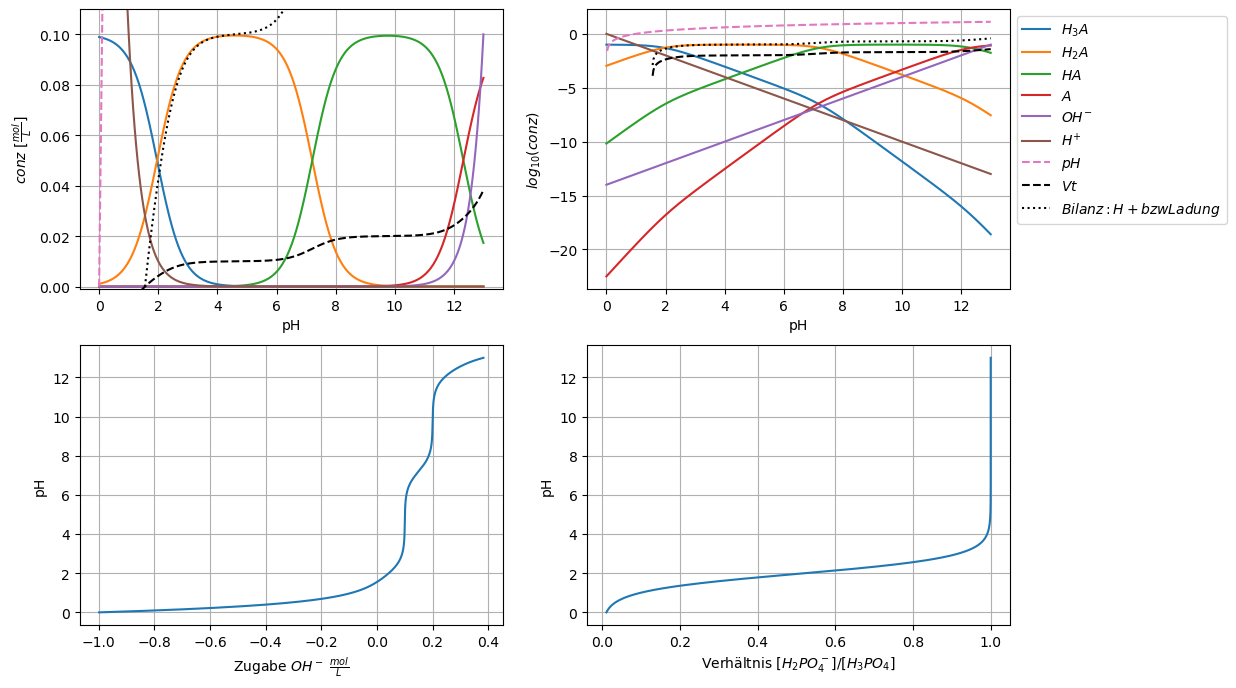

In [265]:
fig, axs = plt.subplots(2,2, figsize = [12,8])

ls = ["-" for i in range(len(werte))]
for i in range(3):
    ls[-(i+1)]="--"
ls[-1] = ":"
colors[len(werte)-1] = "k"

ax = axs[0,0]
abbildung(ax=ax,x=pHs,werte=werte,namen=namen, log=False, ylim=[-0.001,0.11], ls=ls, colors=colors)
#ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)

ax = axs[0,1]
abbildung(ax=ax,x=pHs,werte=werte,namen=namen, log=True, ls=ls,colors=colors)
ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)

ax = axs[1,0]
abbildung(ax=ax,x=werte[-1],werte=[pHs],namen=["Titration"], log=False, ls=ls,colors=colors, xlabel=r"Zugabe $OH^-$ $\frac{mol}{L}$", ylabel="pH")
#ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)

ax = axs[1,1]
x = werte[1]/(werte[0]+werte[1])
abbildung(ax=ax,x=x,werte=[pHs],namen=["Titration"], log=False, ls=ls,colors=colors, xlabel=r"Verhältnis $[H_2PO_4^-] / [H_3PO_4]$", ylabel="pH")
#ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)

In [51]:
# iterative Lösung für ein bestimmtes c0
c0 = 0.1

def iteration(iterationstiefe = 0, pH = 0, delta_pH = 0.1, c0 = 0.1, vorzeichen = 1, max_iterationstiefe=8):
    werte = glgw_berechnungen(pH,c0)
    while werte[-1]*vorzeichen > 0:
        pH += delta_pH
        werte = glgw_berechnungen(pH,c0)
    pH -= delta_pH
    if iterationstiefe < max_iterationstiefe:
        pH = iteration(iterationstiefe = iterationstiefe + 1, c0 = c0, pH = pH, delta_pH = delta_pH/10)
    return pH

werte = glgw_berechnungen(pH, c0 = c0)
vorzeichen = werte[-1]/abs(werte[-1])
                           
pH = iteration(vorzeichen = vorzeichen, c0 = c0)

# Für Lösung werte nochmals bereichnen
werte = glgw_berechnungen(pH,c0)

for i in range(len(werte)):
    print(f"Glgw-Wert: {names[i]:15} {werte[i]:.08g} mol/L    log10(Aktivität):{np.log10(werte[i]):.08g}")

Glgw-Wert: H_3PO_4         1.4562564e-06 mol/L    log10(Aktivität):-5.8367621
Glgw-Wert: H_2PO_4-        0.07706479 mol/L    log10(Aktivität):-1.113144
Glgw-Wert: HPO4--          0.022933701 mol/L    log10(Aktivität):-1.6395259
Glgw-Wert: PO4---          5.2977602e-08 mol/L    log10(Aktivität):-7.2759077
Glgw-Wert: OH-             4.8263426e-08 mol/L    log10(Aktivität):-7.3163819
Glgw-Wert: H+              2.0719623e-07 mol/L    log10(Aktivität):-6.6836181
Glgw-Wert: pH              6.6836181 mol/L    log10(Aktivität):0.82501163
Glgw-Wert: Bilanz:H+ bzw Ladung 1.8632631e-16 mol/L    log10(Aktivität):-15.729726


# 2. Kalk löst sich in reinem Wasser

Beispiel 1: Kalk steht in wässriger Lösung im Gleichgewicht mit Kohlendioxid. Der Kohlendioxidgehalt kann variieren (Algen machen PHotosynthese). 

## Die unabhängigen Reaktionsgleichungen
In jeder unabhängigen Reaktionsgleichung wird eine neue Spezies berücksichtigt 
Lösen von Kalk in Wasser

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(1)$</span> 
    <span style="display:inline-block; width:10.5cm;">$CaCO_3 \ \leftrightarrows \ Ca^{2+} + CO_3^{2-}$ </span>
    <span style="display:inline-block; width:4cm;">$K = 3.36 \cdot 10^{-9}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -8.47$</span>
</div>


Protonierung des Carbonat-Ions

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(2)$</span> 
    <span style="display:inline-block; width:10.5cm;">$HCO_3^- \ \leftrightarrows \ CO_3^{2-} + H^+ $ </span>
    <span style="display:inline-block; width:4cm;">$K = 4.0 \cdot 10^{-11}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -10.40$</span>
</div>
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(2a)$</span> 
    <span style="display:inline-block; width:10.5cm;">$CO_3^{2-} \ \leftrightarrows \ HCO_3^- + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 2.5 \cdot 10^{-4}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -3.6$</span>
</div>

Protonierung des Hydrogencarbonat-Ions

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(3)$</span> 
    <span style="display:inline-block; width:10.5cm;">$H_2CO_3 \ \leftrightarrows \  HCO_3^{-} + H^+ $ </span>
    <span style="display:inline-block; width:4cm;">$K = 3.5 \cdot 10^{-7}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -6.46$</span>
</div>
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(3b)$</span> 
    <span style="display:inline-block; width:10.5cm;">$HCO_3^{-} \ \leftrightarrows \  H_2CO_3 + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 2.9 \cdot 10^{-8}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -7.54$</span>
</div>

Autoprotolyse
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(4)$</span> 
    <span style="display:inline-block; width:10.5cm;">$ H_2O  \ \leftrightarrows \ H^+ + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 1.0 \cdot 10^{-14}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -14$</span>
</div>


## Direktes Lösen des Gleichugnssystems
### Formelumsätze

Reaktion (1): Formelumsatz a
<table>
    <tr> <td></td> <td>$CaCO_3$</td> <td>$\leftrightarrows$</td> <td>$Ca^{2+}$</td> <td>+ $CO_3^{2-}$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>(-a)</td> <td></td> <td>a</td> <td>a</td> </tr>
    <tr> <td>Glgw</td> <td>1)</td> <td></td> <td>a</td> <td>a - b</td> </tr>
</table>

Reaktion (2a): Formelumsatz b
<table>
    <tr> <td></td> <td>$CO_3^{2-}$</td> <td>$\leftrightarrows$</td> <td>$HCO_3^-$</td> <td>+ $OH^-$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-b</td> <td></td> <td>b</td> <td>b</td> </tr>
    <tr> <td>Glgw</td> <td>a-b</td> <td></td> <td>b - c</td> <td>b + c + d</td> </tr>
</table>

Reaktion (3a): Formelumsatz c
<table>
    <tr> <td></td> <td>$HCO_3^-$</td> <td>$\leftrightarrows$</td> <td>$H_2CO_3$</td> <td>+ $OH^-$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-c</td> <td></td> <td>c</td> <td>c</td> </tr>
    <tr> <td>Glgw</td> <td>b-c</td> <td></td> <td>c</td> <td>b + c + d</td> </tr>
</table>

Reaktion (4): Formelumsatz d
<table>
    <tr> <td></td> <td>$H_2O$</td> <td>$\leftrightarrows$</td> <td>$H^+$</td> <td>+ $OH^-$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>(-d)</td> <td></td> <td>d</td> <td>d</td> </tr>
    <tr> <td>Glgw</td> <td>(-d)</td> <td></td> <td>d</td> <td>b + c + d</td> </tr>
</table>

### Bilanzen
- {$CaCO_3$} = 1
- {$Ca^{2+}$} = a
- {$CO_3^{2-}$} = a - b
- {$HCO_3^{-}$} = b - c
- {$H_2CO_3$} = c
- {$H_2O$} = 1
- {$OH^-$} = d + b + c
- {$H_3O^+$} = d

In [21]:


eq1 = a * (a-b) - 3.36E-9
eq2 = (b-c)*(b+c+d)/(a-b) - 2.5E-4
eq3 = c*(b+c+d)/(b-c) - 2.9E-8
eq4 = d * (b+c+d) - 1E-14


In [22]:
#direkter Löseversuch liefert keine Lösung
res = sp.solve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0], eq4.as_numer_denom()[0]],[a,b,c,d])
res

[]

In [23]:
# Lösung für die dominante Reaktion (oder vielleicht zwei dominante Reaktionen)
# Vereinfachung: zweite Deprotonierung und Autoprotolyse weglassen
res = sp.solve([eq1, eq2.subs(c,0).subs(d,0)],[a,b])


In [24]:
print(res)
for i in range(len(res)):
    res_a = res[i][0]
    res_b = res[i][1]
    print()
    print("a",res_a)
    print("b",res_b)
    try:
        print(f"OH- = {res_b:.05g}")
        print(f"Ca++ = {res_a:.05g}")
        print(f"CO3-- = {res_a - res_b:.05g}")
    except:
        print(f"OH- = {res_b}")
        print(f"Ca++ = {res_a}")
        print(f"CO3-- = {res_a - res_b}")
    try:
        print(14+np.log10(float(res_b)))
    except:
        print("pH nicht definiert")


[(1.22637349198685e-5, -0.000261714789726522), (0.000114805029200132, 8.55380186570420e-5), (-6.35343820600002e-5 - 6.31024141032658e-5*I, -3.691161446526e-5 - 8.95441744677846e-5*I), (-6.35343820600002e-5 + 6.31024141032658e-5*I, -3.691161446526e-5 + 8.95441744677846e-5*I)]

a 1.22637349198685e-5
b -0.000261714789726522
OH- = -0.00026171
Ca++ = 0.000012264
CO3-- = 0.00027398
nan

a 0.000114805029200132
b 8.55380186570420e-5
OH- = 0.000085538
Ca++ = 0.00011481
CO3-- = 0.000029267
9.93215918634306

a -6.35343820600002e-5 - 6.31024141032658e-5*I
b -3.691161446526e-5 - 8.95441744677846e-5*I
OH- = -3.691161446526e-5 - 8.95441744677846e-5*I
Ca++ = -6.35343820600002e-5 - 6.31024141032658e-5*I
CO3-- = -2.66227675947402e-5 + 2.64417603645187e-5*I
pH nicht definiert

a -6.35343820600002e-5 + 6.31024141032658e-5*I
b -3.691161446526e-5 + 8.95441744677846e-5*I
OH- = -3.691161446526e-5 + 8.95441744677846e-5*I
Ca++ = -6.35343820600002e-5 + 6.31024141032658e-5*I
CO3-- = -2.66227675947402e-5 - 2.64417

C:\Users\Urs\AppData\Local\Temp\ipykernel_12936\2674633541.py:17: RuntimeWarning: invalid value encountered in log10
  print(14+np.log10(float(res_b)))


In [25]:
# Ergebnisse dieser Berechnung als Startwert für das numerische Lösen
resn = sp.nsolve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0], eq4.as_numer_denom()[0]],[a,b,c,d],[0.000114805029200132,8.55380186570420e-5,1E-7,1E-7])
print(resn)
res_a = float(resn[0])
res_b = float(resn[1])
res_c = float(resn[2])
res_d = float(resn[3])
print(f"Ca++:   {res_a:.06g} mol/L")
print(f"CO3--:  { res_a-res_b:.06g} mol/L")
print(f"HCO3--: {res_b-res_c:.06g} mol/L")
print(f"H2CO3:  {res_c:.06g} mol/L")
print(f"H+:     {res_d:.06g} mol/L")
print(f"OH-:    {res_b+res_c+res_d:.06g} mol/L")
print(f"pH =    {-np.log10(res_d):06g}")

Matrix([[0.000114804996323685], [8.55379773994916e-5], [2.89803169850160e-8], [1.16867868217845e-10]])
Ca++:   0.000114805 mol/L
CO3--:  2.9267e-05 mol/L
HCO3--: 8.5509e-05 mol/L
H2CO3:  2.89803e-08 mol/L
H+:     1.16868e-10 mol/L
OH-:    8.55671e-05 mol/L
pH =    9.9323


## Graphische und iterative Lösung

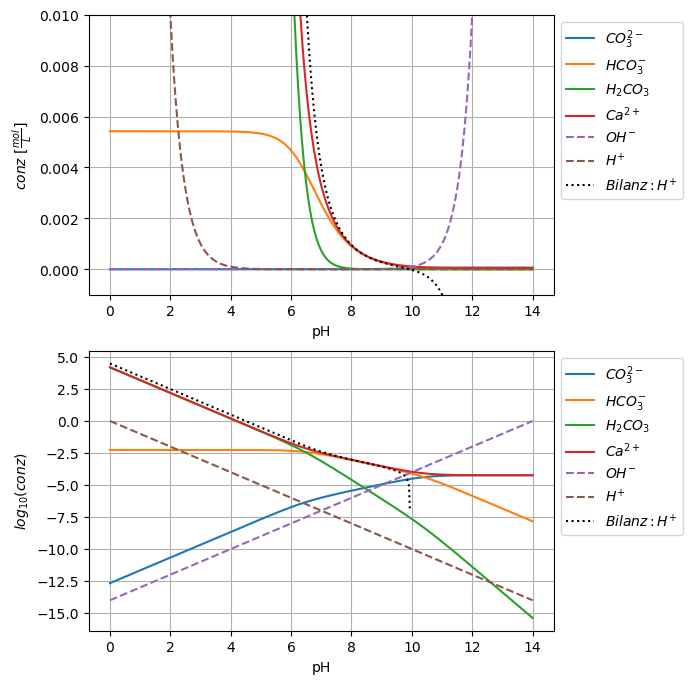

In [27]:
fig, axs = plt.subplots(2, figsize = [6,8])

pHs = np.linspace(0,14,500)

# diese Funktion kann sowohl mit np.arrays als auch mit einzelnen Werten verwendet werden
def glgw_berechnungen(pH): 
    h = 10**-pH
    a_co3 = 1
    a_hco3 = a_co3 * h / 4E-11
    a_h2co3 = a_hco3 * h / 3.5E-7
    a_co3_tot = a_co3 + a_hco3 + a_h2co3
    a_ca = a_co3_tot # Bilanz: pro CaCO3, das sich löst, entsteht ein ca++ und ein co3--, aus dem wiederum alle hco3- und h2co3 entstehen
    f = np.sqrt(3.36E-9/a_ca/a_co3)
    co3 = a_co3 * f
    hco3 = a_hco3 * f
    h2co3 = a_h2co3*f
    ca = a_ca * f
    oh = 10**-14/h
    #grafische Lösung
    # H+ entstehen durch Autoprotolyse und verschwinden durch Bildung von hco3 und h2co3
    bilanz = h - oh + hco3 + 2 * h2co3 #in diesem Fall: H+-Bilanz
    return [co3, hco3, h2co3,ca,oh,h,bilanz]

werte = glgw_berechnungen(pHs)
names = ["CO3--", "HCO3-", "H2CO3","Ca++","OH-","H+","Bilanz:H+"]
namen = []
for n in names:
    namen.append(chem_to_latex(n))


ls = ["-" for i in range(len(werte))]
for i in range(3):
    ls[-(i+1)]="--"
ls[-1] = ":"
colors[len(werte)-1] = "k"

abbildung(ax=axs[0],x=pHs,werte=werte,namen=namen, log=False, ylim=[-0.001,0.01], ls=ls, colors=colors)
axs[0].legend(bbox_to_anchor=(1.0, 1.0), loc=2)
abbildung(ax=axs[1],x=pHs,werte=werte,namen=namen, log=True, ls=ls,colors=colors)
axs[1].legend(bbox_to_anchor=(1.0, 1.0), loc=2)

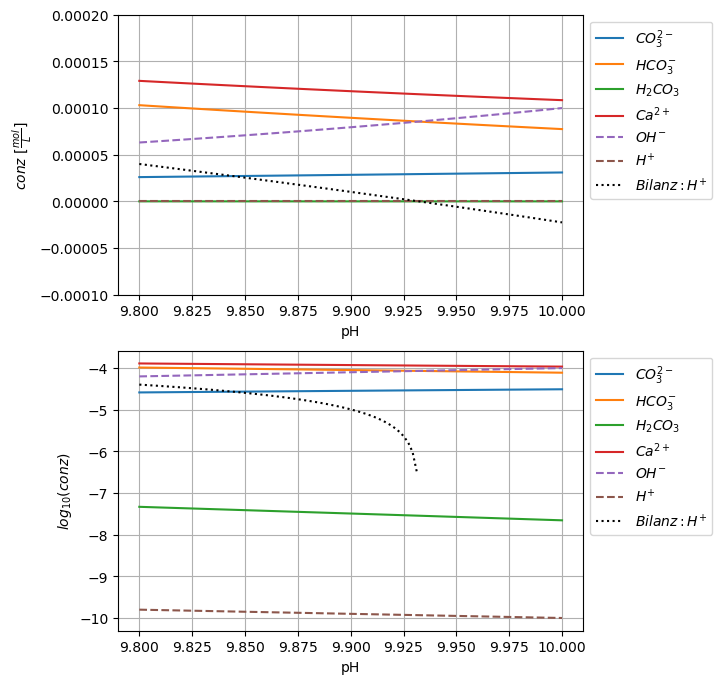

In [28]:
fig, axs = plt.subplots(2, figsize = [6,8])
"""
Graphische Lösungssuche: pH immer mehr eingrenzen und Ort suchen, wo H-Bilanz == 0

"""
pHs = np.linspace(9.8,10,100)
werte = glgw_berechnungen(pHs)

abbildung(ax=axs[0],x=pHs,werte=werte,namen=namen, log=False, ylim=[-0.0001,0.0002], ls=ls, colors=colors)
axs[0].legend(bbox_to_anchor=(1.0, 1.0), loc=2)
abbildung(ax=axs[1],x=pHs,werte=werte,namen=namen, log=True, ls=ls,colors=colors)
axs[1].legend(bbox_to_anchor=(1.0, 1.0), loc=2)

In [29]:
# Lösung mit Iteration 
pH = 0
delta_pH = 1

werte = glgw_berechnungen(pH)
print (werte[-1]) #Bilanzgrösse, die bei Lösung Null sein muss



30984.86676965981


In [30]:
max_iterationstiefe = 8

def iteration(iterationstiefe = 0, pH = 0, delta_pH = 0.1, vorzeichen = 1, pCO2 = 3E-4, max_iterationstiefe=8):
    werte = glgw_berechnungen(pH)
    while werte[-1]*vorzeichen > 0:
        pH += delta_pH
        werte = glgw_berechnungen(pH)
    pH -= delta_pH
    if iterationstiefe < max_iterationstiefe:
        pH = iteration(iterationstiefe = iterationstiefe + 1, pH = pH, delta_pH = delta_pH/10, pCO2 = pCO2)
    return pH
    
pH = iteration()
werte = glgw_berechnungen(pH)

for i in range(len(werte)):
    print(f"Glgw-Wert: {names[i]:15} {werte[i]:.08g} mol/L    log10(Aktivität):{np.log10(werte[i]):.08g}")

Glgw-Wert: CO3--           2.9267019e-05 mol/L    log10(Aktivität):-4.5336215
Glgw-Wert: HCO3-           8.5509425e-05 mol/L    log10(Aktivität):-4.067986
Glgw-Wert: H2CO3           2.8552322e-08 mol/L    log10(Aktivität):-7.5443586
Glgw-Wert: Ca++            0.000114805 mol/L    log10(Aktivität):-3.9400392
Glgw-Wert: OH-             8.5566646e-05 mol/L    log10(Aktivität):-4.0676955
Glgw-Wert: H+              1.1686797e-10 mol/L    log10(Aktivität):-9.9323045
Glgw-Wert: Bilanz:H+       1.5575608e-13 mol/L    log10(Aktivität):-12.807555


# 3. Lösen von Kalk im Gleichgewicht mit CO2 aus der Gasphase
Beispiel 1: Kalk und CO2 lösen sich im Wasser. Der Kohlendioxidgehalt kann variieren (Algen machen PHotosynthese). 
Hier stammt H2CO3 primär nicht aus der Protonierung von Carbonationen, sondern aus dem Gleichgewicht mit CO2 der Gasphase

## Die unabhängigen Reaktionsgleichungen
In jeder unabhängigen Reaktionsgleichung wird eine neue Spezies berücksichtigt 

Lösen von Kalk in Wasser

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(1)$</span> 
    <span style="display:inline-block; width:10.5cm;">$CaCO_3 \ \leftrightarrows \ Ca^{2+} + CO_3^{2-}$ </span>
    <span style="display:inline-block; width:4cm;">$K = 3.36 \cdot 10^{-9}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -8.47$</span>
</div>


Protonierung des Carbonat-Ions

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(2)$</span> 
    <span style="display:inline-block; width:10.5cm;">$HCO_3^- \ \leftrightarrows \ CO_3^{2-} + H^+ $ </span>
    <span style="display:inline-block; width:4cm;">$K = 4.0 \cdot 10^{-11}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -10.40$</span>
</div>
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(2a)$</span> 
    <span style="display:inline-block; width:10.5cm;">$CO_3^{2-} \ \leftrightarrows \ HCO_3^- + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 2.5 \cdot 10^{-4}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -3.6$</span>
</div>

Protonierung des Hydrogencarbonat-Ions

<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(3)$</span> 
    <span style="display:inline-block; width:10.5cm;">$H_2CO_3 \ \leftrightarrows \  HCO_3^{-} + H^+ $ </span>
    <span style="display:inline-block; width:4cm;">$K = 3.5 \cdot 10^{-7}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -6.46$</span>
</div>
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(3b)$</span> 
    <span style="display:inline-block; width:10.5cm;">$HCO_3^{-} \ \leftrightarrows \  H_2CO_3 + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 2.9 \cdot 10^{-8}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -7.54$</span>
</div>

Autoprotolyse
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(4)$</span> 
    <span style="display:inline-block; width:10.5cm;">$ H_2O  \ \leftrightarrows \ H^+ + OH^- $ </span>
    <span style="display:inline-block; width:4cm;">$K = 1.0 \cdot 10^{-14}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -14$</span>
</div>

Lösen von Kohlendioxid in Wasser
<div style="margin-left:2cm;">
    <span style="display:inline-block; width:1.5cm;">$(4)$</span> 
    <span style="display:inline-block; width:10.5cm;">$ CO_2 (g)  \ \leftrightarrows \ H_2CO_3 (aq) \ \   = CO_2 (aq)$ </span>
    <span style="display:inline-block; width:4cm;">$K = 3.4 \cdot 10^{-2}$</span>
    <span style="display:inline-block; width:4cm;">$log_{10}(K) = -1.469$</span>
</div>


## Direktes Lösen des Gleichungssystems


### Formelumsätze

Reaktion (1): Formelumsatz a
<table>
    <tr> <td></td> <td>$CaCO_3$</td> <td>$\leftrightarrows$</td> <td>$Ca^{2+}$</td> <td>+ $CO_3^{2-}$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>(-a)</td> <td></td> <td>a</td> <td>a</td> </tr>
    <tr> <td>Glgw</td> <td>1)</td> <td></td> <td>a</td> <td>a - b</td> </tr>
</table>

Reaktion (2a): Formelumsatz b
<table>
    <tr> <td></td> <td>$CO_3^{2-}$</td> <td>$\leftrightarrows$</td> <td>$HCO_3^-$</td> <td>+ $OH^-$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-b</td> <td></td> <td>b</td> <td>b</td> </tr>
    <tr> <td>Glgw</td> <td>a-b</td> <td></td> <td>b + c</td> <td>b + c + c</td> </tr>
</table>

Reaktion (3a): Formelumsatz c
<table>
    <tr> <td></td> <td>$H_2CO_3$</td> <td>$\leftrightarrows$</td> <td>$HCO_3^-$</td> <td>+ $H^+$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>-c</td> <td></td> <td>c</td> <td>c</td> </tr>
    <tr> <td>Glgw</td> <td>e - c</td> <td></td> <td>b + c</td> <td>b + d</td> </tr>
</table>

Reaktion (4): Formelumsatz d
<table>
    <tr> <td></td> <td>$H_2O$</td> <td>$\leftrightarrows$</td> <td>$H_3O^+$</td> <td>+ $OH^-$</td> </tr>
    <tr> <td>Start </td> <td>1</td> <td></td> <td>0</td> <td>0</td> </tr>
    <tr> <td>Umsatz</td> <td>(-d)</td> <td></td> <td>d</td> <td>d</td> </tr>
    <tr> <td>Glgw</td> <td>(-d)</td> <td></td> <td>c + d</td> <td>b + d</td> </tr>
</table>

Reaktion (5): Formelumsatz e
<table>
    <tr> <td></td> <td>$CO_2 (g)$</td> <td>$\leftrightarrows$</td> <td>$H_2CO_3 (aq)$</td> <td></td> </tr>
    <tr> <td>Start </td> <td>$p(CO_2)$</td> <td></td> <td>0</td> <td></td> </tr>
    <tr> <td>Umsatz</td> <td>(-e)</td> <td></td> <td>e</td> <td></td> </tr>
    <tr> <td>Glgw</td> <td>$p(CO_2)$)</td> <td></td> <td>e - c</td> <td></td> </tr>
</table>

### Bilanzen
- {$CaCO_3$} = 1
- {$Ca^{2+}$} = a
- {$CO_3^{2-}$} = a - b
- {$HCO_3^{-}$} = b + c
- {$H_2CO_3$} = e - c
- {$H_2O$} = 1
- {$OH^-$} = b + d
- {$H_3O^+$} = c + d
- {$CO_2$} = p(CO2)

In [34]:
### a,b,c,d = sp.symbols("a b c d")
pCO2 = 10**-3.5
pCO2 = 1E-6

h2co3 = 3.4E-2 * pCO2 

eq1 = a * (a-b) - 3.36E-9
eq2 = (b+c)*(b+d)/(a-b) - 2.5E-4
eq3 = (b+c)*(c+d)/h2co3 - 3.5E-7
eq4 = (b+d) * (c+d) - 1E-14


### !!! Vorsicht, nächstes Element dauert lange !! 
Daher sind hier diese Rechnungen alle auskommentiert, damit das System nicht bei einem Restart hier hängen bleibt. 

In [36]:
#direkter Löseversuch liefert bereits Lösung, dauert unglaublich lange
"""
res = sp.solve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0], eq4.as_numer_denom()[0]],[a,b,c,d])
res
"""

'\nres = sp.solve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0], eq4.as_numer_denom()[0]],[a,b,c,d])\nres\n'

In [37]:
"""
resn = res[1]
res_a = float(resn[0])
res_b = float(resn[1])
res_c = float(resn[2])
res_d = float(resn[3])
print(f"Ca++:   {res_a:.06g} mol/L")
print(f"CO3--:  {res_a-res_b:.06g} mol/L")
print(f"HCO3--: {res_b+res_c:.06g} mol/L")
print(f"H2CO3:  {h2co3:.06g} mol/L")
print(f"H+:     {res_c+res_d:.06g} mol/L")
print(f"OH-:    {res_b+res_d:.06g} mol/L")
print(f"pH =    {-np.log10(res_c+res_d):06g}")
"""

'\nresn = res[1]\nres_a = float(resn[0])\nres_b = float(resn[1])\nres_c = float(resn[2])\nres_d = float(resn[3])\nprint(f"Ca++:   {res_a:.06g} mol/L")\nprint(f"CO3--:  {res_a-res_b:.06g} mol/L")\nprint(f"HCO3--: {res_b+res_c:.06g} mol/L")\nprint(f"H2CO3:  {h2co3:.06g} mol/L")\nprint(f"H+:     {res_c+res_d:.06g} mol/L")\nprint(f"OH-:    {res_b+res_d:.06g} mol/L")\nprint(f"pH =    {-np.log10(res_c+res_d):06g}")\n'

In [38]:
# Alternatives Vorgehen vereinfachtes System als erster Schätzer
#ohne CO2 und ohne Autoprotolyse
res = sp.solve([eq1.subs(c,0).subs(d,0), eq2.subs(c,0).subs(d,0)],[a,b])
res


[(1.22637349198685e-5, -0.000261714789726522),
 (0.000114805029200132, 8.55380186570420e-5),
 (-6.35343820600002e-5 - 6.31024141032658e-5*I,
  -3.691161446526e-5 - 8.95441744677846e-5*I),
 (-6.35343820600002e-5 + 6.31024141032658e-5*I,
  -3.691161446526e-5 + 8.95441744677846e-5*I)]

In [39]:
# Welche Lösung liefert gute Näherung?
print(res)
for i in range(len(res)):
    res_a = res[i][0]
    res_b = res[i][1]
    print()
    print("a",res_a)
    print("b",res_b)
    try:
        print(f"OH- = {res_b:.05g}")
        print(f"Ca++ = {res_a:.05g}")
        print(f"CO3-- = {res_a - res_b:.05g}")
    except:
        print(f"OH- = {res_b}")
        print(f"Ca++ = {res_a}")
        print(f"CO3-- = {res_a - res_b}")
    try:
        print(14+np.log10(float(res_b)))
    except:
        print("pH nicht definiert")

[(1.22637349198685e-5, -0.000261714789726522), (0.000114805029200132, 8.55380186570420e-5), (-6.35343820600002e-5 - 6.31024141032658e-5*I, -3.691161446526e-5 - 8.95441744677846e-5*I), (-6.35343820600002e-5 + 6.31024141032658e-5*I, -3.691161446526e-5 + 8.95441744677846e-5*I)]

a 1.22637349198685e-5
b -0.000261714789726522
OH- = -0.00026171
Ca++ = 0.000012264
CO3-- = 0.00027398
nan

a 0.000114805029200132
b 8.55380186570420e-5
OH- = 0.000085538
Ca++ = 0.00011481
CO3-- = 0.000029267
9.93215918634306

a -6.35343820600002e-5 - 6.31024141032658e-5*I
b -3.691161446526e-5 - 8.95441744677846e-5*I
OH- = -3.691161446526e-5 - 8.95441744677846e-5*I
Ca++ = -6.35343820600002e-5 - 6.31024141032658e-5*I
CO3-- = -2.66227675947402e-5 + 2.64417603645187e-5*I
pH nicht definiert

a -6.35343820600002e-5 + 6.31024141032658e-5*I
b -3.691161446526e-5 + 8.95441744677846e-5*I
OH- = -3.691161446526e-5 + 8.95441744677846e-5*I
Ca++ = -6.35343820600002e-5 + 6.31024141032658e-5*I
CO3-- = -2.66227675947402e-5 - 2.64417

C:\Users\Urs\AppData\Local\Temp\ipykernel_12936\2331918143.py:18: RuntimeWarning: invalid value encountered in log10
  print(14+np.log10(float(res_b)))


In [40]:
# Ergebnisse dieser Berechnung als Startwert für das numerische Lösen
resn = sp.nsolve([eq1.as_numer_denom()[0], eq2.as_numer_denom()[0], eq3.as_numer_denom()[0], eq4.as_numer_denom()[0]],[a,b,c,d],[0.000114805029200132,8.55380186570420e-5,1E-7,1E-7])
print(resn)
res_a = float(resn[0])
res_b = float(resn[1])
res_c = float(resn[2])
res_d = float(resn[3])
print(f"Ca++:   {res_a:.06g} mol/L")
print(f"CO3--:  { res_a-res_b:.06g} mol/L")
print(f"HCO3--: {res_b-res_c:.06g} mol/L")
print(f"H2CO3:  {h2co3:.06g} mol/L")
print(f"H+:     {res_c + res_d:.06g} mol/L")
print(f"OH-:    {res_b + res_d:.06g} mol/L")
print(f"pH =    {-np.log10(res_c + res_d):06g}")

Matrix([[0.000115003859306066], [8.57874484806036e-5], [7.44281602926561e-6], [-7.44268838831058e-6]])
Ca++:   0.000115004 mol/L
CO3--:  2.92164e-05 mol/L
HCO3--: 7.83446e-05 mol/L
H2CO3:  3.4e-08 mol/L
H+:     1.27641e-10 mol/L
OH-:    7.83448e-05 mol/L
pH =    9.89401


### Graphisch-Iterative Lösung

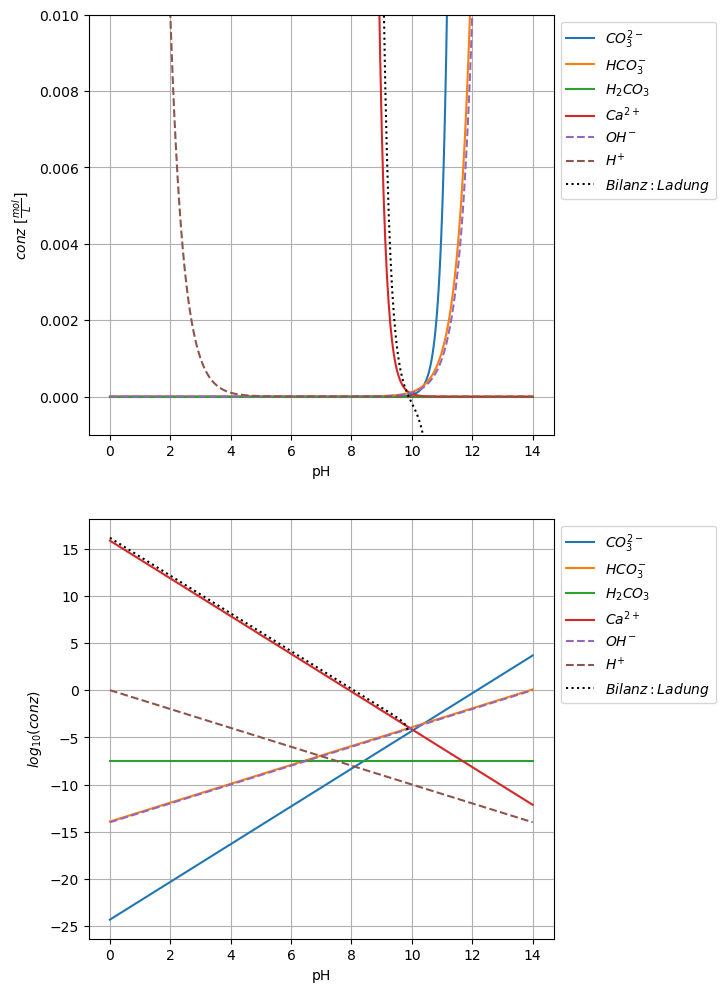

In [42]:
fig, axs = plt.subplots(2, figsize = [6,12])

pHs = np.linspace(0,14,500)
pCO2 = 1E-6
# diese Funktion kann sowohl mit np.arrays als auch mit einzelnen Werten verwendet werden
def glgw_berechnungen(pH, pCO2 = 3E-4):    
    h = 10**-pH
    KS1 = 3.5E-7
    KS2 = 4E-11
    try:
        h2co3 = np.ones(len(pH))* pCO2 * 3.4E-2
    except: 
        h2co3 = pCO2 * 3.4E-2
    hco3 = KS1 * h2co3 / h
    co3 = KS2 * hco3 / h
    ca = 3.36E-9/co3
    oh = 10**-14/h
    #grafische Lösung
    # H+ entstehen durch Autoprotolyse und verschwinden durch Bildung von hco3 und h2co3
    bilanz = 2 * ca + h - hco3 - 2*co3 - oh #Ladung, da nur ungeladene Teilchen zugegeben werden
    return [co3, hco3, h2co3,ca, oh, h, bilanz]

werte = glgw_berechnungen(pHs, pCO2 = pCO2)
names = ["CO3--", "HCO3-", "H2CO3","Ca++","OH-","H+","Bilanz:Ladung"]
namen = []
for n in names:
    namen.append(chem_to_latex(n))


ls = ["-" for i in range(len(werte))]
for i in range(3):
    ls[-(i+1)]="--"
ls[-1] = ":"
colors[len(werte)-1] = "k"

"""
for w in werte:
    print(len(w))
"""
abbildung(ax=axs[0],x=pHs,werte=werte,namen=namen, log=False, ylim=[-0.001,0.01], ls=ls, colors=colors)
axs[0].legend(bbox_to_anchor=(1.0, 1.0), loc=2)
abbildung(ax=axs[1],x=pHs,werte=werte,namen=namen, log=True, ls=ls,colors=colors)
axs[1].legend(bbox_to_anchor=(1.0, 1.0), loc=2)

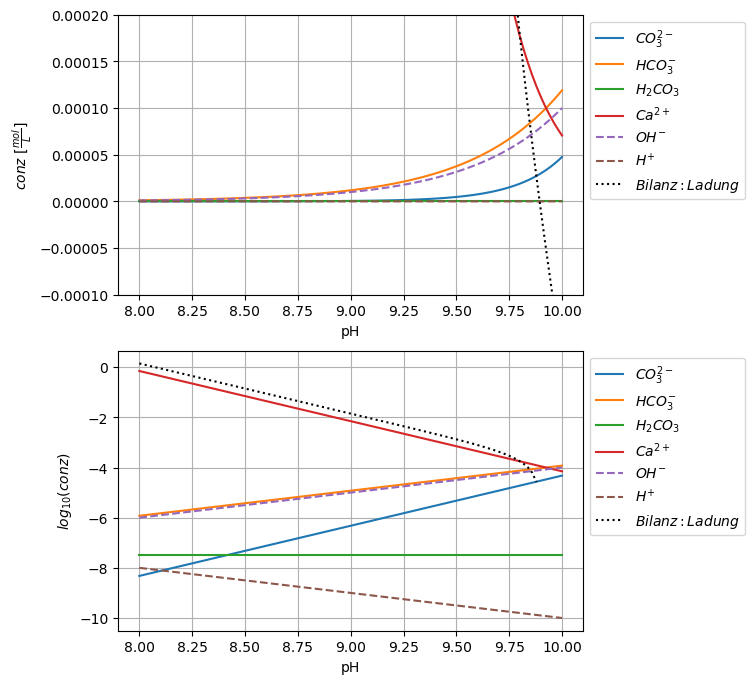

In [43]:

"""
Graphische Lösungssuche: pH immer mehr eingrenzen und Ort suchen, wo H-Bilanz == 0

"""
pHs = np.linspace(8,10,100)
werte = glgw_berechnungen(pHs, pCO2 = pCO2)

fig, axs = plt.subplots(2, figsize = [6,8])
abbildung(ax=axs[0],x=pHs,werte=werte,namen=namen, log=False, ylim=[-0.0001,0.0002], ls=ls, colors=colors)
axs[0].legend(bbox_to_anchor=(1.0, 1.0), loc=2)
abbildung(ax=axs[1],x=pHs,werte=werte,namen=namen, log=True, ls=ls,colors=colors)
axs[1].legend(bbox_to_anchor=(1.0, 1.0), loc=2)

In [44]:
# Lösung mit Iteration 
pCO2 = 1E-6

def iteration(iterationstiefe = 0, pH = 0, delta_pH = 0.1, vorzeichen = 1, pCO2 = 3E-4, max_iterationstiefe=8):
    werte = glgw_berechnungen(pH, pCO2)
    # die zweite Bedingung verhindert, dass bei falscher Vorzeichenbehandlung der Loop ins Unendliche läuft
    while werte[-1]*vorzeichen > 0 and pH < 16:
        pH += delta_pH
        werte = glgw_berechnungen(pH, pCO2 = pCO2)
    pH -= delta_pH
    if iterationstiefe < max_iterationstiefe:
        pH = iteration(iterationstiefe = iterationstiefe + 1, pH = pH, delta_pH = delta_pH/10, pCO2 = pCO2)
    return pH
    
pH = 0
delta_pH = 1

werte = glgw_berechnungen(pH,pCO2)
print ("bilanzgrösse start", werte[-1]) #Bilanzgrösse, die bei Lösung Null sein muss
vorzeichen = werte[-1]/abs(werte[-1])


pH = iteration(vorzeichen=vorzeichen, pCO2 = pCO2, max_iterationstiefe = 2)
werte = glgw_berechnungen(pH)

for i in range(len(werte)):
    print(f"Glgw-Wert: {names[i]:15} {werte[i]:.08g} mol/L    log10(Aktivität):{np.log10(werte[i]):.08g}")

bilanzgrösse start 1.4117647058823532e+16
Glgw-Wert: CO3--           0.0087649232 mol/L    log10(Aktivität):-2.0572519
Glgw-Wert: HCO3-           0.027969079 mol/L    log10(Aktivität):-1.5533218
Glgw-Wert: H2CO3           1.02e-05 mol/L    log10(Aktivität):-4.9913998
Glgw-Wert: Ca++            3.833462e-07 mol/L    log10(Aktivität):-6.4164088
Glgw-Wert: OH-             7.834476e-05 mol/L    log10(Aktivität):-4.10599
Glgw-Wert: H+              1.2764096e-10 mol/L    log10(Aktivität):-9.89401
Glgw-Wert: Bilanz:Ladung   -0.045576504 mol/L    log10(Aktivität):nan


C:\Users\Urs\AppData\Local\Temp\ipykernel_12936\670755616.py:27: RuntimeWarning: invalid value encountered in log10
  print(f"Glgw-Wert: {names[i]:15} {werte[i]:.08g} mol/L    log10(Aktivität):{np.log10(werte[i]):.08g}")


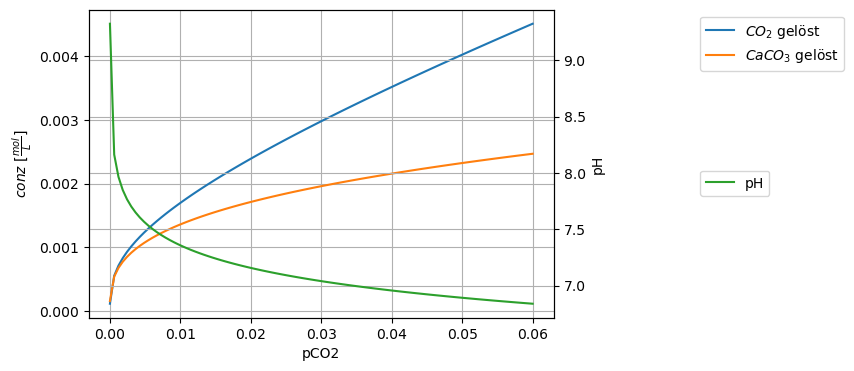

In [45]:
# Verlauf
pCO2s = np.linspace(1E-5,0.06,100)
pH_r = []
kalk_geloest = []
co2_geloest = []

for pCO2 in pCO2s:
    pH = 0
    delta_pH = 1
    
    werte = glgw_berechnungen(pH, pCO2)
    
    vorzeichen = werte[-1]/abs(werte[-1])
                               
    pH = iteration(vorzeichen = -vorzeichen, pCO2 = pCO2, max_iterationstiefe = 12)
    
    werte = glgw_berechnungen(pH, pCO2)
    kalk_geloest.append(werte[3]) #Ca++
    pH_r.append(pH)
    co2_geloest.append(werte[0]+werte[1]+werte[2]-werte[3]) #h2co3 + hco3 + co3 - Ca (alle gelösten Spezies ausser denjenigen, die durch das Lösen von Kalk hinzukamen)

fig, axs = plt.subplots(1, figsize = [6,4])
ax = axs
werte = [co2_geloest, kalk_geloest]
namen = ["$CO_2$ gelöst","$CaCO_3$ gelöst"]
abbildung(ax=ax,x=pCO2s,werte=werte,namen=namen, log=False, ls=ls, colors=colors, xlabel="pCO2")
ax.legend(bbox_to_anchor=(1.3, 1.0), loc=2)
ax1 = ax.twinx()
werte = [pH_r]
namen = ["pH"]
abbildung(ax=ax1,x=pCO2s,werte=werte,namen=namen, log=False, ls=ls, colors=[colors[2]], ylabel="pH")
ax1.legend(bbox_to_anchor=(1.3, 0.5), loc=2)    


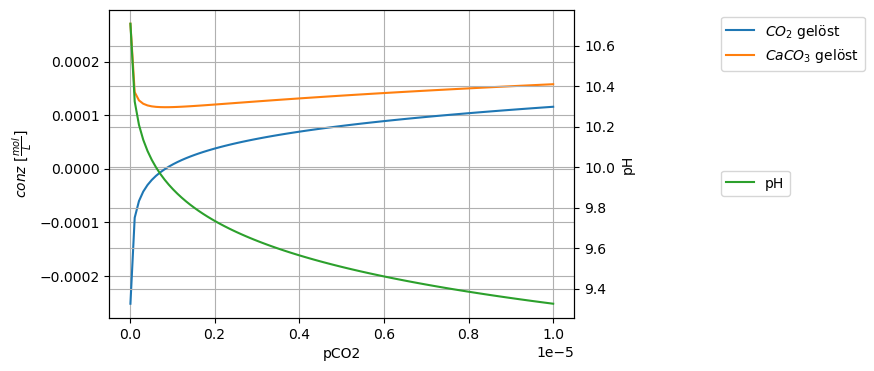

In [46]:
pCO2s = np.linspace(1E-8,1E-5,100)
pH_r = []
kalk_geloest = []
co2_geloest = []

for pCO2 in pCO2s:
    pH = 0
    delta_pH = 1
    
    werte = glgw_berechnungen(pH, pCO2)
    
    vorzeichen = werte[-1]/abs(werte[-1])
                               
    pH = iteration(vorzeichen = -vorzeichen, pCO2 = pCO2, max_iterationstiefe = 12)
    
    werte = glgw_berechnungen(pH, pCO2)
    kalk_geloest.append(werte[3]) #Ca++
    pH_r.append(pH)
    co2_geloest.append(werte[0]+werte[1]+werte[2]-werte[3]) #h2co3 + hco3 + co3 - Ca (alle gelösten Spezies ausser denjenigen, die durch das Lösen von Kalk hinzukamen)

fig, axs = plt.subplots(1, figsize = [6,4])
ax = axs
werte = [co2_geloest, kalk_geloest]
namen = ["$CO_2$ gelöst","$CaCO_3$ gelöst"]
abbildung(ax=ax,x=pCO2s,werte=werte,namen=namen, log=False, ls=ls, colors=colors, xlabel="pCO2")
ax.legend(bbox_to_anchor=(1.3, 1.0), loc=2)
ax1 = ax.twinx()
werte = [pH_r]
namen = ["pH"]
abbildung(ax=ax1,x=pCO2s,werte=werte,namen=namen, log=False, ls=ls, colors=[colors[2]], ylabel="pH")
ax1.legend(bbox_to_anchor=(1.3, 0.5), loc=2)    


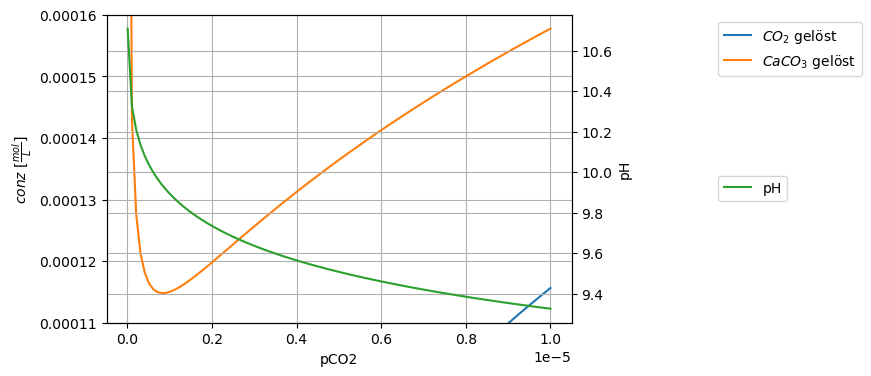

In [47]:
fig, axs = plt.subplots(1, figsize = [6,4])
ax = axs
werte = [co2_geloest, kalk_geloest]
namen = ["$CO_2$ gelöst","$CaCO_3$ gelöst"]
abbildung(ax=ax,x=pCO2s,werte=werte,namen=namen, log=False, ls=ls, colors=colors, ylim=[0.00011,0.00016], xlabel="pCO2")
ax.legend(bbox_to_anchor=(1.3, 1.0), loc=2)
ax1 = ax.twinx()
werte = [pH_r]
namen = ["pH"]
abbildung(ax=ax1,x=pCO2s,werte=werte,namen=namen, log=False, ls=ls, colors=[colors[2]], ylabel="pH")
ax1.legend(bbox_to_anchor=(1.3, 0.5), loc=2) 

# 4. Metall-Komplexe

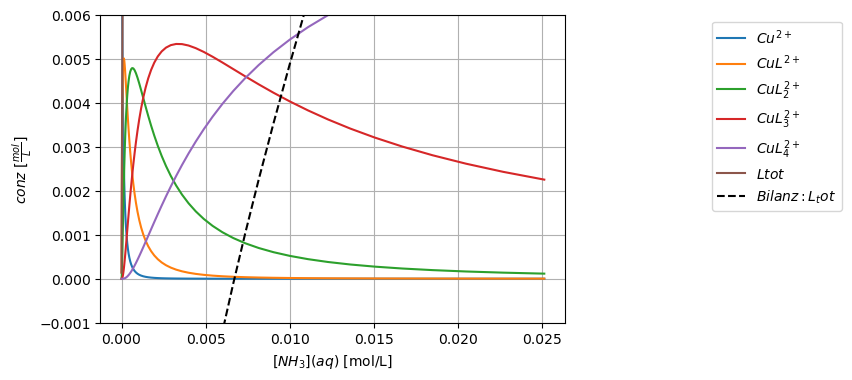

In [49]:
def glgw_berechnungen(L, Me_0 = 0.01, L_0 = 0):    
    K = [1, 10**4.15,10**(4.15+3.50), 10**(4.15+3.50+2.89), 10**(4.15+3.50+2.89+2.13)]
    a_Me_L = []
    Me_L = []
    for i in range(len(K)):
        a_Me_L.append(1 * L**i * K[i]) # relativer Anteil des i-ten Komplexes mit Anteil 1 für freies Kupfer
    a_Me_L = np.array(a_Me_L)
    Me_L = a_Me_L * Me_0 / np.sum(a_Me_L, axis=0)
    #print(a_Me_L)
    #print(Me_L)
    L_tot =np.copy(L)
    for i in range(len(Me_L)):
        L_tot += Me_L[i]*i  
    bilanz = L_tot - L_0 #L_tot soll der zugegebenen Menge an Ligand entsprechen
    return np.concatenate((Me_L,np.array([L_tot, bilanz])),axis=0)

names = ["Cu++", "CuL++", "CuL2++","CuL3++","CuL4++","L tot","Bilanz: L_tot"]
namen = []
for n in names:
    namen.append(chem_to_latex(n))
logLs = np.linspace(-6,-1.6,100)
Ls = 10**logLs 



werte = glgw_berechnungen(Ls, Me_0 = 0.01, L_0=0.04)
fig, axs = plt.subplots(1, figsize = [6,4])

ax = axs

ls = ["-" for i in range(len(werte))]
ls[-1] = "--"

abbildung(ax=ax,x=Ls,werte=werte[:],namen=namen, log=False, colors = colors, ylim=[-0.001,0.006],xlabel="$[NH_3] (aq)$ [mol/L]", ls = ls)
ax.legend(bbox_to_anchor=(1.3, 1), loc=2) 


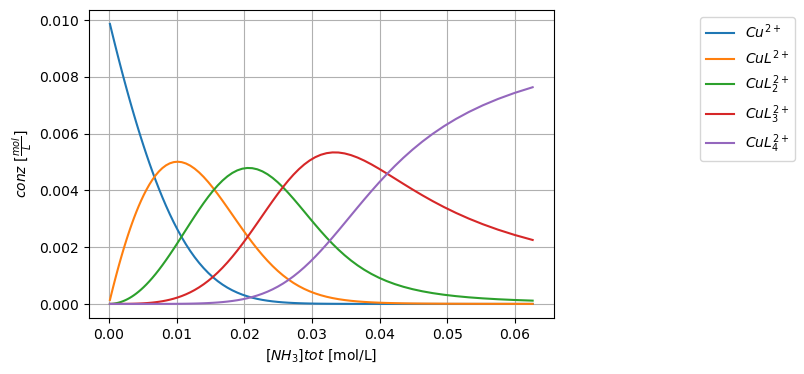

In [50]:
fig, axs = plt.subplots(1, figsize = [6,4])
ax = axs
abbildung(ax=ax,x=werte[-2],werte=werte[:-2],namen=namen, log=False, colors = colors, xlabel="$[NH_3] tot$ [mol/L]")
ax.legend(bbox_to_anchor=(1.3, 1), loc=2) 

Solver: Wie ist die Speziierung, wenn die GEsamtmenge des zugesetzten Ammoniak = 0.04 ist?

In [52]:
def iteration(iterationstiefe = 0, L = 0.0, delta_L = 0.001, vorzeichen = 1, L_0 = 0.1, max_iterationstiefe=12):
    werte = glgw_berechnungen(L,L_0 = L_0 )
    while werte[-1]*vorzeichen > 0 and L < 100:
        L += delta_L
        werte = glgw_berechnungen(L,L_0 = L_0 )
    L -= delta_L
    if iterationstiefe < max_iterationstiefe:
        L = iteration(iterationstiefe = iterationstiefe + 1, L = L, delta_L = delta_L/10, vorzeichen = vorzeichen)
    return L

L_0 = 0.04
L = 1E-20
werte = glgw_berechnungen(L,L_0 = L_0 )
print("werte:",werte)
print("Bilanzwert:",werte[-1])
vorzeichen = werte[-1]/abs(werte[-1])
vorzeichen = -1
L = iteration(L = L, vorzeichen = vorzeichen, L_0 = L_0)
L

werte: [ 1.00000000e-02  1.41253754e-18  4.46683592e-35  3.46736850e-52
  4.67735141e-70  1.42253754e-18 -4.00000000e-02]
Bilanzwert: -0.04


0.06112497121800475

# 5. Metallkomplexe mit NH3 und Fällung infolge der Reaktion von NH3 als Base
## Mit Fällung
Hier werden die Konzentrationen der verschiedenen Spezies dargestellt für einen fixen pH als Funktion der freien Ligandenkonzentration
also: pH: gepuffert beim eingestellten pH

Für $Cu(OH)_2 (s)$ wird hier natürlich nicht die Konzentration oder Aktivität angezeigt, sondern die Menge, die pro Liter gefällt wurde und nicht mehr in der wässrigen Lösung vorliegt sondern in eigener Phase

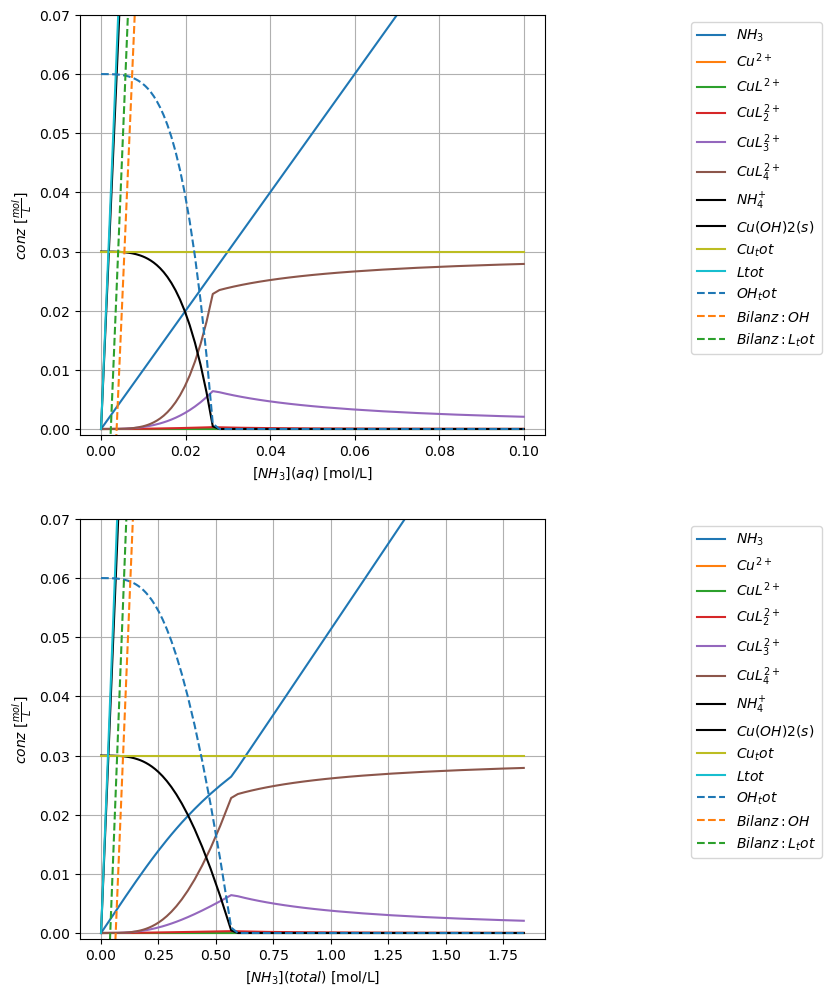

In [54]:

Me_0 = 0.03
logLs = np.linspace(-6,-1,200)
pH = 8
def glgw_berechnungen(L, pH, Me_0 = 0.01, L_0 = 0, KL = 10**-20):  
    h = 10**-pH
    oh = 10**-14/h
    HL = L * h / (10**-9.21)# protonierter Ligand (NH4+)
    K = [1, 10**4.15,10**(4.15+3.50), 10**(4.15+3.50+2.89), 10**(4.15+3.50+2.89+2.13)]
    a_Me_L = []
    Me_L = []
    for i in range(len(K)):
        a_Me_L.append(1.0 * L**i * K[i]) # relativer Anteil des i-ten Komplexes mit Anteil 1 für freies Kupfer
    a_Me_L = np.array(a_Me_L)
    Me_L = a_Me_L * Me_0 / np.sum(a_Me_L, axis=0)

    
    try: 
        indexe = np.where(Me_L[0] * oh**2 > KL)
        Me_L[:,indexe] = Me_L[:,indexe] / Me_L[0,indexe] * (KL / oh**2)  # Konzentration des freien Ions wird durch den pH bestimmt
    except: 
        if Me_L[0] * oh**2 > KL:
            Me_L = Me_L / Me_L[0] * (KL / oh**2)  # Konzentration des freien Ions wird durch den pH bestimmt

        
    Me_tot_sol = np.sum(Me_L, axis=0) 
    Me_OH2 = Me_0 - Me_tot_sol
    Me_tot = Me_tot_sol + Me_OH2
    L_tot =np.copy(L) + HL
    for i in range(len(Me_L)):
        L_tot = L_tot + Me_L[i]*i *1.0
    OH_tot = oh + 2 * Me_OH2
    bilanz1 = HL + h - OH_tot # OH- bilanz: enstehung: Autoprotolyse plus OH, die mit der Bilung von NH4+ = HL entstehen, vorliegen: OH und in Fällung
    bilanz2 = L_tot - L_0 #L_tot soll der zugegebenen Menge an Ligand entsprechen
    return np.concatenate((Me_L,np.array([HL, Me_OH2, Me_tot, L_tot, OH_tot, bilanz1, bilanz2])),axis=0)


names = ["NH3","Cu++", "CuL++", "CuL2++","CuL3++","CuL4++","NH4+","Cu(OH)2(s)","Cu_tot","L tot","OH_tot","Bilanz: OH","Bilanz: L_tot"]
namen = []
for n in names:
    namen.append(chem_to_latex(n))

Ls = 10**logLs 



werte = np.concatenate (([Ls], glgw_berechnungen(Ls, pH = pH, Me_0 = Me_0 , L_0=0.04)),axis=0)

fig, axs = plt.subplots(2, figsize = [6,12])

ax = axs

ls = ["-" for i in range(len(werte))]
for i in range(3):
    ls[-(i+1)] = "--"

ax = axs[0]
abbildung(ax=ax,x=Ls,werte=werte[:],namen=namen, log=False, colors = colors, ylim=[-0.001,0.07],xlabel="$[NH_3] (aq)$ [mol/L]", ls = ls)
ax.legend(bbox_to_anchor=(1.3, 1), loc=2) 
ax = axs[1]
abbildung(ax=ax,x=werte[9],werte=werte[:],namen=namen, log=False, ylim=[-0.001,0.07],colors = colors,xlabel="$[NH_3] (total)$ [mol/L]", ls = ls)
ax.legend(bbox_to_anchor=(1.3, 1), loc=2) 

<>:53: SyntaxWarning: invalid escape sequence '\ '
<>:53: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Urs\AppData\Local\Temp\ipykernel_12936\231427849.py:53: SyntaxWarning: invalid escape sequence '\ '
  "Cu(OH)_2 (s)","Cu_tot","L tot","OH_tot","Bilanz: OH (sollte\ durch\ Iteration\ überall\ Null\ sein)","Bilanz: L_tot"]
C:\Users\Urs\AppData\Local\Temp\ipykernel_12936\555489691.py:18: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  indexe = np.where(Me_L[0] * oh**2 > KL)


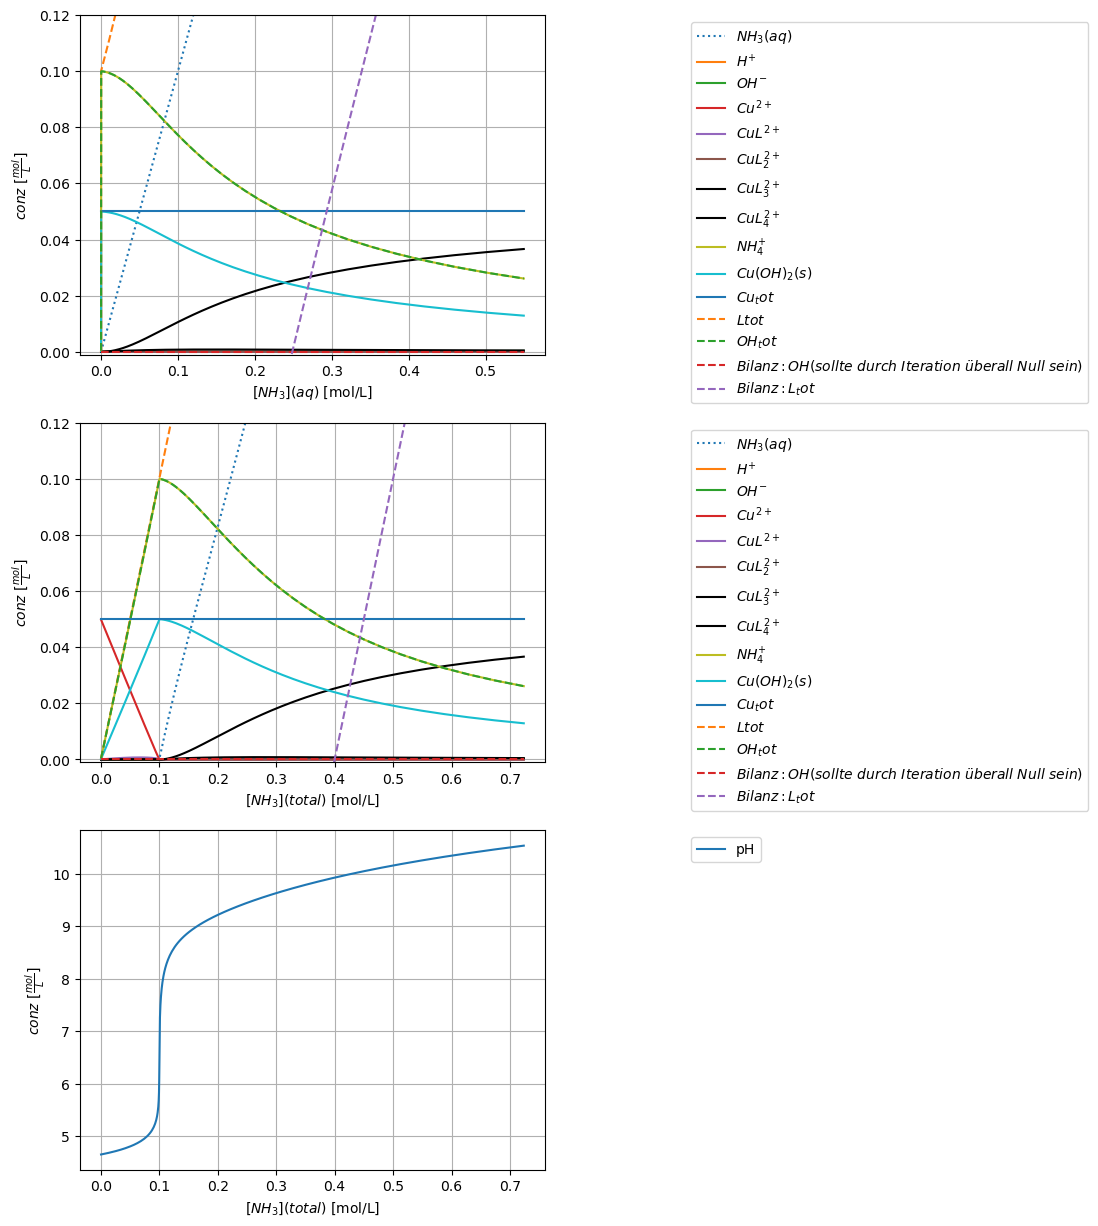

In [55]:
# nun muss für jede Konzentration an freien L der passende pH gefunden werden.
KL = 10**-20
Me_0 = 0.05
logLs = np.linspace(-8,-0.26,200)

# damit die Bilanz der gesuchten totalen Ligandenmenge angezeigt wird
L_0 = 0.4

Ls = 10**logLs
wertes=[]

#start-pH jeder Iteration
pH = 2

def iteration(iterationstiefe = 0, L_0 = 0.04, Me_0 = 0.01, pH = 0, L = 0, delta_pH = 0.1, delta_L = 0.1, 
              vorzeichen = 1, max_iterationstiefe=12, KL = 10E-20):
    werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)

    #für die gegebenen Menge an freiem Liganden den passenden pH suchen
    while werte[-2]*vorzeichen > 0 and pH < 16:
        # print("werte in iteration",werte[-2], pH, werte)
        pH += delta_pH
        werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
    pH -= delta_pH
    
    if iterationstiefe < max_iterationstiefe:
        L, pH = iteration(iterationstiefe = iterationstiefe + 1, L=L, pH  = pH,  L_0 = L_0, Me_0 = Me_0, 
                          delta_pH = delta_pH/10, delta_L = delta_L, vorzeichen = vorzeichen, KL = KL)
    return L, pH



for L in Ls:
    werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
    #print("werte:",werte)
    #print("Bilanzwert:",werte[-2]) # pH
    vorzeichen = werte[-2]/abs(werte[-2])

    #L_0 hat keine Bedeutung, solange nicht für ein bestimmten Wert gesolved wird
    L1, pH = iteration(L= L, pH = pH, Me_0 = Me_0, delta_pH = 0.1, vorzeichen = vorzeichen, max_iterationstiefe=8, L_0 = L_0, KL = KL) 

    #print("berecnungen",glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0))
    werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
    # print("werte nach optimierung: OH-Bilanz",werte[-2], werte)
    wertes.append(np.concatenate((np.array([L, 10**-pH, 10**-14/10**-pH]), glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)),axis=0))


#  Me_L,np.array([HL, Me_OH2, Me_tot, L_tot, OH_tot, bilanz1, bilanz2])
wertes = transpose_with_zip(wertes)

# bilanz L_tot hat keine Bedeutung, weil nicht für ein bestimmtes Ltot gelöst wird.
names = ["NH3 (aq)", "H+", "OH-","Cu++", "CuL++", "CuL2++","CuL3++","CuL4++","NH4+",
         "Cu(OH)_2 (s)","Cu_tot","L tot","OH_tot","Bilanz: OH (sollte\ durch\ Iteration\ überall\ Null\ sein)","Bilanz: L_tot"]
namen = []
for n in names:
    namen.append(chem_to_latex(n))

ls = ["-" for i in range(len(wertes))]
for i in range(4):
    ls[-(i+1)] = "--"
ls[7] = "-"
ls[0] = ":"

fig, axs = plt.subplots(3, figsize = [6,15])
ax = axs[0]
abbildung(ax=ax,x=Ls,werte=wertes[:],namen=namen, log=False, colors = colors, ylim=[-0.001,0.12],xlabel="$[NH_3] (aq)$ [mol/L]", ls = ls)
ax.legend(bbox_to_anchor=(1.3, 1), loc=2) 
ax = axs[1]
abbildung(ax=ax,x=wertes[11],werte=wertes[:],namen=namen, log=False, colors = colors, ylim=[-0.001,0.12],xlabel="$[NH_3] (total)$ [mol/L]", ls = ls)
ax.legend(bbox_to_anchor=(1.3, 1), loc=2)
ax = axs[2]
abbildung(ax=ax,x=wertes[11],werte=[-np.log10(wertes[1])],namen=["pH"], log=False, colors = colors,xlabel="$[NH_3] (total)$ [mol/L]", ls = ["-"])
ax.legend(bbox_to_anchor=(1.3, 1), loc=2) 

## Lösung für eine bestimmte Menge an zugegebenem Ammoniak
Sucht man die Lösung für eine bestimmte Menge an zugegebenem Ammoniak, so muss man nach zwei Mastervariabeln lösen - den pH und dann die totale Menge an Ligand. Man muss also in zwei Dimensionen lösen: 

- Dabei wird man für jede freie Ligandenkonzentration den richtigen pH suchen anhand der OH-Bilanz (wie oben)
- Unter diesen Lösungen sucht man diejenige freie Ligandenkonzentration, welche der richtigen totalen Ligandenmenge entspricht.

Die Lösung kann man natürlich auch grafisch in den obigen Diagrammen ablesen. 
  

In [57]:
# nun muss für jede Konzentration an freien L der passende pH gefunden werden.
KL = 10**-20
Me_0 = 0.05
logLs = np.linspace(-8,-0.26,200)

# Totale Ligandenkonzentration, nach der gelöst werden muss
L_0 = 0.4

# Startwert für Suche. Grösser als Null, um allfällige Nullen zu vermeiden
L = 1E-20

    
def iteration(iterationstiefe = 0, L_0 = 0.04, Me_0 = 0.01, pH = 0, L = 0, delta_pH = 0.1, delta_L = 0.1, 
              vorzeichen = 1, max_iterationstiefe=12, KL = 10E-20):
    werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)

    #für die gegebenen Menge an freiem Liganden den passenden pH suchen
    while werte[-2]*vorzeichen > 0 and pH < 16:
        # print("werte in iteration",werte[-2], pH, werte)
        pH += delta_pH
        werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
    pH -= delta_pH
    
    if iterationstiefe < max_iterationstiefe:
        L, pH = iteration(iterationstiefe = iterationstiefe + 1, L=L, pH  = pH,  L_0 = L_0, Me_0 = Me_0, 
                          delta_pH = delta_pH/10, delta_L = delta_L, vorzeichen = vorzeichen, KL = KL)
    return L, pH

def iteration_2(iterationstiefe_2 = 0, L_0 = 0.04, Me_0 = 0.01, pH = 0, L = 0, delta_pH = 0.1, delta_L = 0.1, 
              vorzeichen_2 = 1, max_iterationstiefe_2=12, KL = 10E-20):   
    
    werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
    while werte[-1]*vorzeichen_2 > 0 and L < 100:
        # print("werte in iteration",werte[-2], pH, werte)
        L += delta_L

        ######
        # hier folgt nun die Iteration nach pH wie oben
        pH = 2
        werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
        #print("werte:",werte)
        #print("Bilanzwert:",werte[-2]) # pH
        vorzeichen = werte[-2]/abs(werte[-2]) # bilanzwert OH
        L1, pH = iteration(L= L, pH = pH, Me_0 = Me_0, delta_pH = 0.1, vorzeichen = vorzeichen, max_iterationstiefe=8, L_0 = L_0, KL = KL) 
        werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)    
        #####
    
    L -= delta_L
    if iterationstiefe_2 < max_iterationstiefe_2:
        L, pH = iteration_2(iterationstiefe_2 = iterationstiefe_2 + 1, L=L, pH  = pH,  L_0 = L_0, Me_0 = Me_0, 
                          delta_pH = delta_pH, delta_L = delta_L/10, vorzeichen_2 = vorzeichen_2, KL = KL)    
    return L, pH
    
werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)
vorzeichen_2 = werte[-1]/abs(werte[-1]) # hier der andere Bilanzwert (Ltot)

L, pH = iteration_2(iterationstiefe_2 = 0, L_0 = L_0, Me_0 = Me_0, pH = pH, L = L, delta_pH = 0.1, delta_L = 0.1, 
              vorzeichen_2 = vorzeichen_2, max_iterationstiefe_2=12, KL = KL)

print("Lösung:")
print("pH = ",pH)
print("[H+] = ", 10**-pH)
print("[OH-] = ", 10**(pH-14))
print("L = ",L," (freie Ligandenkonzentration)")
werte = glgw_berechnungen(L=L, pH=pH, Me_0 = Me_0, L_0 = L_0, KL = KL)

#(Me_L,np.array([HL, Me_OH2, Me_tot, L_tot, OH_tot, bilanz1, bilanz2


names = ["Cu++", "CuL++", "CuL2++","CuL3++","CuL4++","NH4+","Cu(OH)2(s)","Cu_tot","L tot","OH_tot","Bilanz: OH","Bilanz: L_tot"]
for i, w in enumerate(werte):
    print(names[i], w)

C:\Users\Urs\AppData\Local\Temp\ipykernel_12936\555489691.py:18: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  indexe = np.where(Me_L[0] * oh**2 > KL)


Lösung:
pH =  9.92440023757147
[H+] =  1.1901446876605825e-10
[OH-] =  8.402339735395183e-05
L =  0.2485734963590001  (freie Ligandenkonzentration)
Cu++ 1.4164443775667054e-12
CuL++ 4.9734109460952215e-09
CuL2++ 3.90939152267605e-06
CuL3++ 0.0007543345294788831
CuL4++ 0.0252940754046285
NH4+ 0.04797937467734156
Cu(OH)2(s) 0.023947675699542554
Cu_tot 0.05
L tot 0.3999999999997486
OH_tot 0.04797937479643906
Bilanz: OH -8.302386556024999e-14
Bilanz: L_tot -2.514100039263667e-13


# Korrektur der Aktivität entsprechend Ladung und Ionenstärke (Davies-Gleichung)
#https://de.wikipedia.org/wiki/Davies-Gleichung

im Massenwirkungsgesetz werden Aktivitäten a, nicht Konzentrationen c eingetragen
die Umrechnung erfolgt mittels Faktor f:
    
a = c * f

Die Dielektrizitätskonstante hängt auch von der Konzentration der Ionen ab, 
was hier aber nicht berücksichtigt wird (unten für Kochsalz vorbereitet, aber c = 0 eingesetzt)



In [343]:
epsilon_0 = 8.854E-12
def epsilon_H2O(theta, c_salz = 0): 
    alpha_salz = 7.85 #L/mol, Kochsalz, Bramley, 1928, Dielectric constant of aqueous solutions of sodium chloride DOI 10.1016/S0016-0032(28)90984-9
    # Empirische Werte Permittivität von reinem Wasser bzw. Dielektrizitätskonstante
    """
    from scipy.optimize import curve_fit
    temp = [273.16,300,325,350,372.76]
    epsi = [87.9,77.75,69.32,61.79,55.61]
    def test(x, a, b, c):
        return a + b*x + c*x**2
    # curve_fit() function takes the test-function
    # x-data and y-data as argument and returns
    # the coefficients a and b in param and
    # the estimated covariance of param in param_cov
    param, param_cov = curve_fit(test, temp, epsi)
    
    print("Resultat Fit",param, param_cov)
    # ERGIBT 2.49414758e+02 -7.87428382e-01  7.17812282e-04
    """
    T = 273.15 + theta
    epsilon_r = 2.49414758e+02 - 7.87428382e-01*T + 7.17812282e-04*T**2
    #print("epsilon_r=",epsilon_r)

    return  epsilon_r * epsilon_0 *(1-alpha_salz * c_salz)

for theta in [0,25,50,100]:
    print("epsilon_r bei theta = ",theta,"ist",epsilon_H2O(theta)/epsilon_0)
print()

T = 273.15 + 25



def B_debye_hueckel(theta):
    T = 273.15 + theta
    e = 1.602E-19
    NA = 6.022E23
    kB = 1.38E-23 
    return (2* e**2 *NA/ (epsilon_H2O(theta)*kB*T))**0.5 

def A_debye_hueckel(theta, c_salz = 0):
    # 0.5 bei 25°C in reinem Wasser
    T = 273.15 + theta
    e = 1.602E-19
    NA = 6.022E23
    kB = 1.38E-23 
    A_si = e**2/(sp.log(10.0)*8*3.14159*epsilon_H2O(theta, c_salz = c_salz)*kB*T) * B_debye_hueckel(theta)
    return A_si *(1000)**0.5 #umrechnung m3 in L

for theta in [0,15,20,60,80]:
    print("A={} in sqrt(L/mol),B={:.05g} in sqrt(L/m2/mol)".format(A_debye_hueckel(theta),B_debye_hueckel(theta)*(1000)**0.5), theta)
    
   
    
theta = 25
IS_log = np.linspace(-5,-0.3,100)
IS = 10**IS_log
z = [1] # Ladungszahl des Ions
j = 1

def f_a(theta,z,i_s, v_f = 0.3, c_salz = 0):
    lg_f = -A_debye_hueckel(theta, c_salz = c_salz) * z**2 * (i_s**0.5/(1 + i_s**0.5) - v_f * i_s)
    return 10**lg_f
    

epsilon_r bei theta =  0 ist 87.88533199855016
epsilon_r bei theta =  25 ist 78.45177636621517
epsilon_r bei theta =  50 ist 69.91548608638016
epsilon_r bei theta =  100 ist 55.53470158421017

A=0.490810016491446 in sqrt(L/mol),B=3.2462e+09 in sqrt(L/m2/mol) 0
A=0.501542908346251 in sqrt(L/mol),B=3.2697e+09 in sqrt(L/m2/mol) 15
A=0.505768538121976 in sqrt(L/mol),B=3.2789e+09 in sqrt(L/m2/mol) 20
A=0.550467493022061 in sqrt(L/mol),B=3.3728e+09 in sqrt(L/m2/mol) 60
A=0.579418542058266 in sqrt(L/mol),B=3.4309e+09 in sqrt(L/m2/mol) 80


/n/n konkretes Beispiel: Lösung von 25% Salicylsäure
c0 = 1.4194867136043605
[-0.00983024344102146, 0.00976263514348227]
0.00976263514348227
pH rechnerisch 2.01043294116459
pH korrigiert mit Davies-Gleichung 1.96616450132316
c0 =  0.5951532288003905
Massenprozent =  10.481838665632477
/n/n konkretes Beispiel: pH von Lösungen von Phosphorsäurespezies
ohne Korrektur Davies
pH = 7.21

Verwendeter Faktor für Gleichung =  0.1
c = 0.025, Ionenstärke = 0.1
Aktivitäten: a(HPO4--) = 0.0084711 und a(H2PO4-) = 0.019074 
pH nach davies = 6.8575, pH gemessen = 6.83
grobe Berücksichtigung Ionenkonzentration für Berechnung von epsilon: Konstanten für Kochsalz (passt nicht)
 pH nach davies = 6.1846, pH gemessen = 6.83

Verwendeter Faktor für Gleichung =  0.1
c = 0.05, Ionenstärke = 0.2
Aktivitäten: a(HPO4--) = 0.012853 und a(H2PO4-) = 0.035603 
pH nach davies = 6.7675, pH gemessen = 6.77
grobe Berücksichtigung Ionenkonzentration für Berechnung von epsilon: Konstanten für Kochsalz (passt nicht)
 pH nac

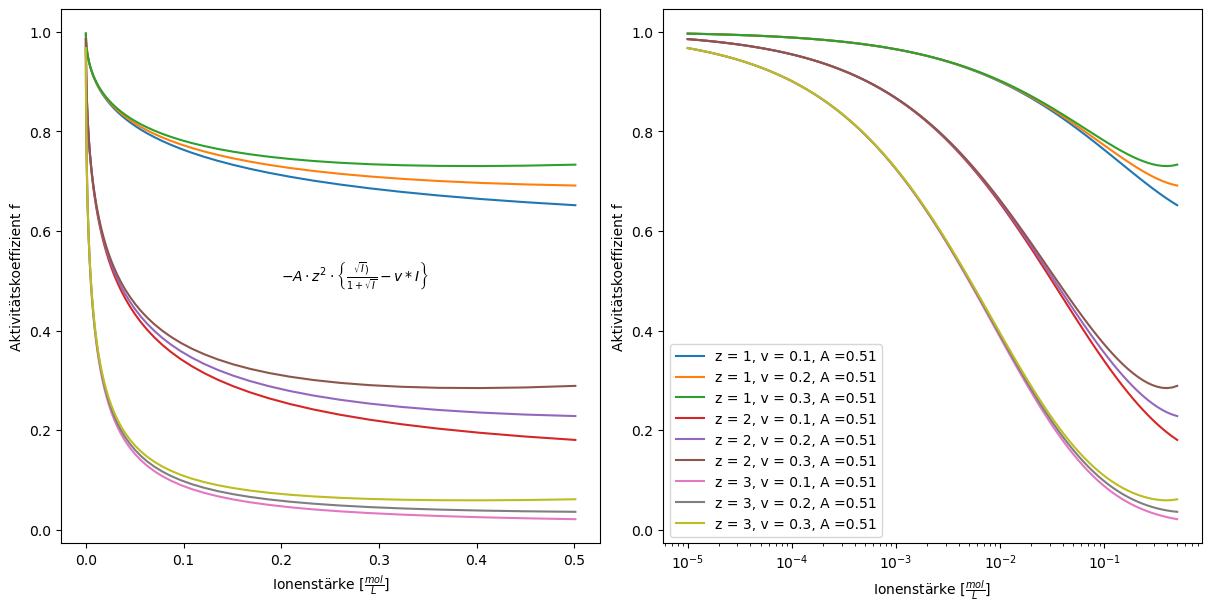

In [345]:
fig, ax = plt.subplots(ncols = 2, constrained_layout = True, figsize = (12,6))
    
for i in range(3):
    for v_f in [0.1, 0.2, 0.3]:
        f_list = []
        z = i+1
        for i_s in IS:
             f_list.append(f_a(theta,z,i_s, v_f = v_f))
        ax[0].plot(IS,f_list)
        ax[1].plot(IS,f_list, label = "z = {}, v = {}, A ={:.02g}".format(z,v_f,A_debye_hueckel(theta)))

ax[1].set_xscale("log")
ax[1].legend()

for a in ax:
    a.set_xlabel(r"Ionenstärke $[\frac{mol}{L}]$")
    a.set_ylabel("Aktivitätskoeffizient f")

text =r"$-A \cdot z^2 \cdot \left\{\frac{\sqrt{I})}{1+\sqrt{I}} - v * I \right\}$"

ax[0].text(0.2,0.5,text)


## Konkretes Beispiel schwache Säure
print("/n/n konkretes Beispiel: Lösung von 25% Salicylsäure")
#nachträglich anpassen!
c_ionen = np.array([0.0097,0.0097])
z_ionen = np.array([1,-1])
i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)

f = f_a(theta,1,i_s)

M = 176.12   #g/mol
massenprozent = 25
c0 = (massenprozent/100) * 1000/M # g/L/(g/mol) = mol/L
print("c0 =",c0)

x = sp.symbols("x")
K = 10**-4.17
eq = x*x/(c0-x) - K

res = sp.solve(eq,x)
print(res)

x1 = res[1]
print(x1)
print("pH rechnerisch",-sp.log(x1)/sp.log(10.0))
print("pH korrigiert mit Davies-Gleichung",-sp.log(x1/f)/sp.log(10.0) )

## Massenprozent aus pH
pH = 2.2
H = 10**-pH

A = H
HA = A*H/K

print("c0 = ", A + HA)
print("Massenprozent = ", (A+HA)*M/1000*100)


## Konkretes Beispiel schwache Säure
print("/n/n konkretes Beispiel: pH von Lösungen von Phosphorsäurespezies")
print("ohne Korrektur Davies")
# Lösung gleicher Mengen an Natriumdihydrogenphosphat und Natriumhydrogenphosphat

pKS = 7.21

print ("pH = {}".format(pKS))

c_list = [0.025, 0.05, 0.1, 0.2]
pH_gemessen_t = ["6.8(3)","6.7(7)","6.7(1)","6.6(2)"] # gemäss c+b Oktober 2021
pH_gemessen = [6.83,6.77,6.71,6.62]
theta = 25



for i in range(len(c_list)):
    print()
    v_f = 0.1 # 0.1 stimmt für Phosphat am besten
    print("Verwendeter Faktor für Gleichung = ",v_f)
    c = c_list[i]
    c_ionen = np.array([3*c, c, c]) # Na+ H2PO4- HPO4--
    z_ionen = np.array([1,-1, -2])
    i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)
    print("c = {}, Ionenstärke = {}".format(c,i_s))
    print("Aktivitäten: a(HPO4--) = {:.05g} und a(H2PO4-) = {:.05g} ".format(c*f_a(theta,-2,i_s,v_f = v_f), c*f_a(theta,-1,i_s,v_f = v_f)))
    pH = pKS + sp.log(f_a(theta,-2,i_s,v_f = v_f) / f_a(theta,-1,i_s,v_f = v_f) )/sp.log(10.0)
    print("pH nach davies = {:.05g}, pH gemessen = {}".format(pH,pH_gemessen[i]))
    print( "grobe Berücksichtigung Ionenkonzentration für Berechnung von epsilon: Konstanten für Kochsalz (passt nicht)")
    pH = pKS + sp.log(f_a(theta,-2,i_s,v_f = v_f, c_salz = 3*c) / f_a(theta,-1,i_s,v_f = v_f) )/sp.log(10.0)
    print(" pH nach davies = {:.05g}, pH gemessen = {}".format(pH,pH_gemessen[i]))

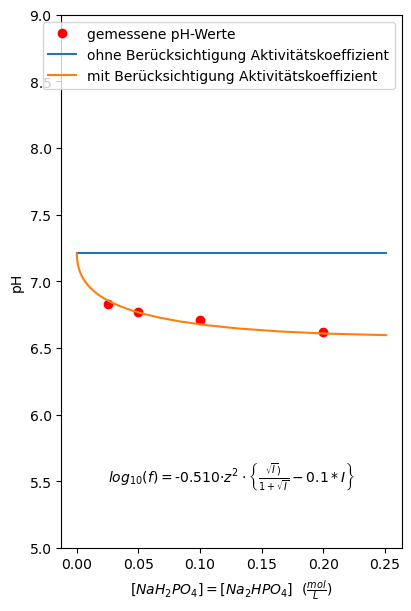

In [346]:
# Dihydrogenphosphat/Hydrogenphosphat
v_f = 0.1
fig, ax = plt.subplots(ncols = 1, constrained_layout = True, figsize = (4,6))
ax.plot(c_list, pH_gemessen, 'or', label="gemessene pH-Werte")

text1 = r"$log_{10}(f) = $"+ "-{:.03g}".format(A_debye_hueckel(theta, c_salz = 0))
text = text1 + r"$ \cdot z^2 \cdot \left\{\frac{\sqrt{I})}{1+\sqrt{I}} - v * I \right\}$".replace("v",str(v_f))
ax.text(0.025, 5.5,text)
cs_log = np.linspace(-10,-0.6,100)
cs = 10**cs_log
pHs_ohne = cs*0+7.21
pHs = []
for i in range(len(cs)):
    c = cs[i]
    c_ionen = np.array([3*c, c, c]) # Na+ H2PO4- HPO4--
    z_ionen = np.array([1,-1, -2])
    i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)
    pHs.append(pKS + sp.log(f_a(theta,-2,i_s,v_f = v_f) / f_a(theta,-1,i_s,v_f = v_f) )/sp.log(10.0))
ax.plot(cs,pHs_ohne, label="ohne Berücksichtigung Aktivitätskoeffizient")
ax.plot(cs,pHs, label = "mit Berücksichtigung Aktivitätskoeffizient")
ax.set_ylim([5,9])
ax.set_xlabel(r"$[NaH_2PO_4] = [Na_2HPO_4] \ \  (\frac{mol}{L})$")
ax.set_ylabel("pH")
ax.legend()

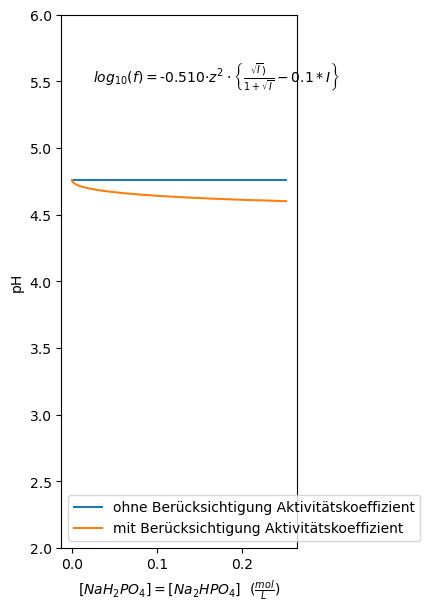

In [348]:
 # Essigsäure/Acetat
pKS = 4.76
v_f = 0.1
fig, ax = plt.subplots(ncols = 1, constrained_layout = True, figsize = (4,6))
#ax.plot(c_list, pH_gemessen, 'or', label="gemessene pH-Werte")

text1 = r"$log_{10}(f) = $"+ "-{:.03g}".format(A_debye_hueckel(theta, c_salz = 0))
text = text1 + r"$ \cdot z^2 \cdot \left\{\frac{\sqrt{I})}{1+\sqrt{I}} - v * I \right\}$".replace("v",str(v_f))
ax.text(0.025, 5.5,text)
cs_log = np.linspace(-10,-0.6,100)
cs = 10**cs_log
pHs_ohne = cs*0+4.76
pHs = []
for i in range(len(cs)):
    c = cs[i]
    c_ionen = np.array([c, c]) # Na+ H2PO4- HPO4--
    z_ionen = np.array([1, -1])
    i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)
    pHs.append(pKS + sp.log(f_a(theta,-1,i_s,v_f = v_f) / f_a(theta,0,i_s,v_f = v_f) )/sp.log(10.0))
ax.plot(cs,pHs_ohne, label="ohne Berücksichtigung Aktivitätskoeffizient")
ax.plot(cs,pHs, label = "mit Berücksichtigung Aktivitätskoeffizient")
ax.set_ylim([2,6])
ax.set_xlabel(r"$[NaH_2PO_4] = [Na_2HPO_4] \ \  (\frac{mol}{L})$")
ax.set_ylabel("pH")
ax.legend()

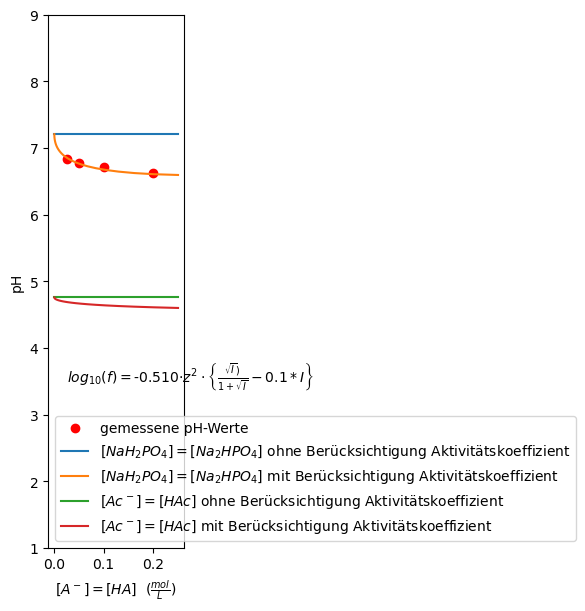

In [350]:
# job = 2 und job = 3
# Dihydrogenphosphat/Hydrogenphosphat und essigsäure /Acetat
v_f = 0.1
pKS = 7.21
fig, ax = plt.subplots(ncols = 1, constrained_layout = True, figsize = (4,6))
ax.plot(c_list, pH_gemessen, 'or', label="gemessene pH-Werte")

text1 = r"$log_{10}(f) = $"+ "-{:.03g}".format(A_debye_hueckel(theta, c_salz = 0))
text = text1 + r"$ \cdot z^2 \cdot \left\{\frac{\sqrt{I})}{1+\sqrt{I}} - v * I \right\}$".replace("v",str(v_f))
ax.text(0.025, 3.5,text)
cs_log = np.linspace(-10,-0.6,100)
cs = 10**cs_log
pHs_ohne = cs*0+7.21
pHs = []
for i in range(len(cs)):
    c = cs[i]
    c_ionen = np.array([3*c, c, c]) # Na+ H2PO4- HPO4--
    z_ionen = np.array([1,-1, -2])
    i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)
    pHs.append(pKS + sp.log(f_a(theta,-2,i_s,v_f = v_f) / f_a(theta,-1,i_s,v_f = v_f) )/sp.log(10.0))
ax.plot(cs,pHs_ohne, label= r"$[NaH_2PO_4] = [Na_2HPO_4]$ ohne Berücksichtigung Aktivitätskoeffizient")
ax.plot(cs,pHs, label = r"$[NaH_2PO_4] = [Na_2HPO_4]$ mit Berücksichtigung Aktivitätskoeffizient")

pKS = 4.76
pHs_ohne = cs*0+4.76
pHs = []
for i in range(len(cs)):
    c = cs[i]
    c_ionen = np.array([c, c]) # Na+ H2PO4- HPO4--
    z_ionen = np.array([1, -1])
    i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)
    pHs.append(pKS + sp.log(f_a(theta,-1,i_s,v_f = v_f) / f_a(theta,0,i_s,v_f = v_f) )/sp.log(10.0))
ax.plot(cs,pHs_ohne, label=r"$[Ac^-] = [HAc]$ ohne Berücksichtigung Aktivitätskoeffizient")
ax.plot(cs,pHs, label = "$[Ac^-] = [HAc]$ mit Berücksichtigung Aktivitätskoeffizient")


ax.set_ylim([1,9])
ax.set_xlabel(r"$[A^-] = [HA] \ \  (\frac{mol}{L})$")
ax.set_ylabel("pH")
ax.legend()

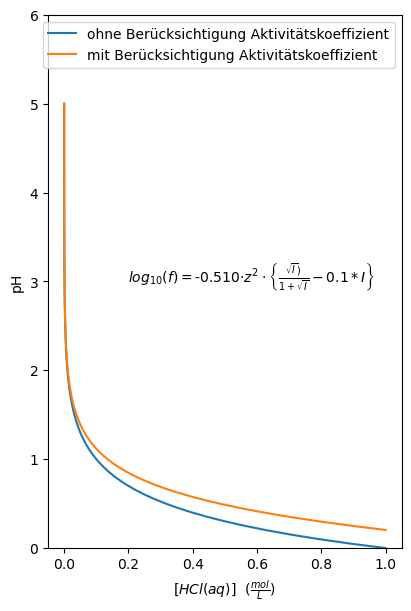

In [352]:
# Salzsäure
v_f = 0.1
fig, ax = plt.subplots(ncols = 1, constrained_layout = True, figsize = (4,6))
#ax.plot(c_list, pH_gemessen, 'or', label="gemessene pH-Werte")

text1 = r"$log_{10}(f) = $"+ "-{:.03g}".format(A_debye_hueckel(theta, c_salz = 0))
text = text1 + r"$ \cdot z^2 \cdot \left\{\frac{\sqrt{I})}{1+\sqrt{I}} - v * I \right\}$".replace("v",str(v_f))
ax.text(0.2, 3,text)
cs_log = np.linspace(-5,0,100)
cs = 10**cs_log
pHs_ohne = -np.log10(cs)
pHs = []
for i in range(len(cs)):
    c = cs[i]
    c_ionen = np.array([c, c]) # Na+ H2PO4- HPO4--
    z_ionen = np.array([1, -1])
    i_s = 0.5 * np.sum(z_ionen**2 * c_ionen)
    pHs.append(-sp.log(f_a(theta,1,i_s,v_f = v_f)*c)/sp.log(10.0))
ax.plot(cs,pHs_ohne, label="ohne Berücksichtigung Aktivitätskoeffizient")
ax.plot(cs,pHs, label = "mit Berücksichtigung Aktivitätskoeffizient")
ax.set_ylim([0,6])
ax.set_xlabel(r"$[HCl (aq)] \ \  (\frac{mol}{L})$")
ax.set_ylabel("pH")
ax.legend()
#ax.set_xscale("log")